In [35]:
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import seaborn as sns
import keras
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
from sklearn.metrics import mean_squared_error,r2_score
# %matplotlib inline

In [21]:
boston = datasets.load_boston()
df = pd.DataFrame(boston.data,columns=boston.feature_names)
df['target'] = boston.target
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


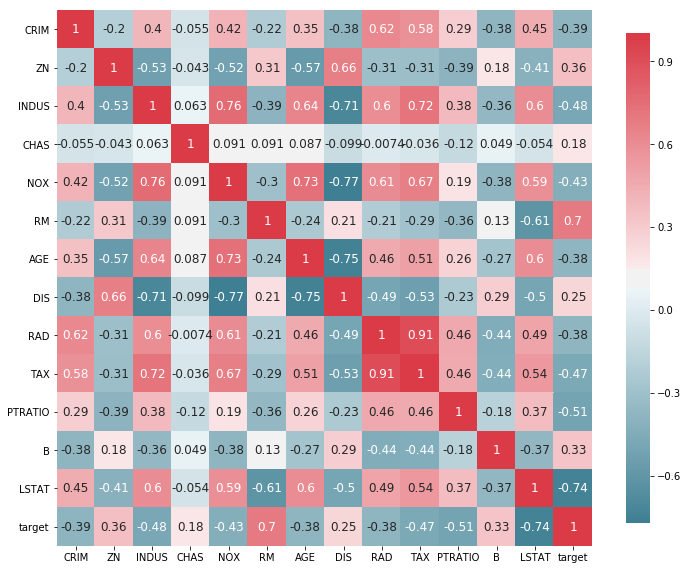

In [28]:
_ , ax = plt.subplots( figsize =( 12 , 10 ) )
corr = df.corr(method='pearson')
cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
_ = sns.heatmap(
    corr,
    cmap=cmap,
    square=True,
    cbar_kws={ 'shrink' : .9 }, 
    ax=ax, 
    annot = True, 
    annot_kws = { 'fontsize' : 12 })

In [29]:
X_train,X_test,y_train,y_test = train_test_split(df[['RM', 'LSTAT', 'PTRATIO']], df[['target']],test_size=0.3,random_state=0)

In [30]:
X_train = np.array(MinMaxScaler().fit_transform(X_train))
y_train = np.array(MinMaxScaler().fit_transform(y_train))
X_test =  np.array(MinMaxScaler().fit_transform(X_test))
y_test =  np.array(MinMaxScaler().fit_transform(y_test))

In [31]:
#Network Parameters
m = len(X_train)
n = 3   # Number of features
n_hidden = 20  # Number of hidden neurons


# Hyperparameters
batch = 20
eta = 0.01
max_epoch = 100

In [32]:
model = Sequential()
model.add(Dense(n_hidden,input_dim=n,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 20)                80        
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 21        
Total params: 101
Trainable params: 101
Non-trainable params: 0
_________________________________________________________________


In [33]:
model.compile(loss="mean_squared_error",optimizer='adam')

In [34]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=max_epoch,batch_size=batch,verbose=1)

Train on 354 samples, validate on 152 samples
Epoch 1/100


 20/354 [>.............................] - ETA: 4s - loss: 0.1238

354/354 [==============================] - 0s 943us/step - loss: 0.1122 - val_loss: 0.1148


Epoch 2/100
 20/354 [>.............................] - ETA: 0s - loss: 0.1629

354/354 [==============================] - 0s 118us/step - loss: 0.0958 - val_loss: 0.0979


Epoch 3/100
 20/354 [>.............................] - ETA: 0s - loss: 0.0757

354/354 [==============================] - 0s 147us/step - loss: 0.0817 - val_loss: 0.0826


Epoch 4/100
 20/354 [>.............................] - ETA: 0s - loss: 0.0687

354/354 [==============================] - 0s 168us/step - loss: 0.0693 - val_loss: 0.0708


Epoch 5/100
 20/354 [>.............................] - ETA: 0s - loss: 0.0442

354/354 [==============================] - 0s 141us/step - loss: 0.0601 - val_loss: 0.0620


Epoch 6/100
 20/354 [>.............................] - ETA: 0s - loss: 0.0424

354/354 [==============================] - 0s 139us/step - loss: 0.0539 - val_loss: 0.0556


Epoch 7/100
 20/354 [>.............................] - ETA: 0s - loss: 0.0492

354/354 [==============================] - 0s 135us/step - loss: 0.0497 - val_loss: 0.0514


Epoch 8/100
 20/354 [>.............................] - ETA: 0s - loss: 0.0684

354/354 [==============================] - 0s 148us/step - loss: 0.0468 - val_loss: 0.0487


Epoch 9/100
 20/354 [>.............................] - ETA: 0s - loss: 0.0370

354/354 [==============================] - 0s 136us/step - loss: 0.0449 - val_loss: 0.0467


Epoch 10/100
 20/354 [>.............................] - ETA: 0s - loss: 0.0306



354/354 [==============================] - 0s 132us/step - loss: 0.0434 - val_loss: 0.0450


Epoch 11/100
 20/354 [>.............................] - ETA: 0s - loss: 0.0562

354/354 [==============================] - 0s 151us/step - loss: 0.0421 - val_loss: 0.0435


Epoch 12/100
 20/354 [>.............................] - ETA: 0s - loss: 0.0338



354/354 [==============================] - 0s 131us/step - loss: 0.0407 - val_loss: 0.0422


Epoch 13/100
 20/354 [>.............................] - ETA: 0s - loss: 0.0197



354/354 [==============================] - 0s 135us/step - loss: 0.0393 - val_loss: 0.0408


Epoch 14/100
 20/354 [>.............................] - ETA: 0s - loss: 0.0399

354/354 [==============================] - 0s 143us/step - loss: 0.0378 - val_loss: 0.0393


Epoch 15/100
 20/354 [>.............................] - ETA: 0s - loss: 0.0194

354/354 [==============================] - 0s 142us/step - loss: 0.0362 - val_loss: 0.0378


Epoch 16/100
 20/354 [>.............................] - ETA: 0s - loss: 0.0181



354/354 [==============================] - 0s 133us/step - loss: 0.0346 - val_loss: 0.0363


Epoch 17/100
 20/354 [>.............................] - ETA: 0s - loss: 0.0124

354/354 [==============================] - 0s 143us/step - loss: 0.0329 - val_loss: 0.0347


Epoch 18/100
 20/354 [>.............................] - ETA: 0s - loss: 0.0453

354/354 [==============================] - 0s 180us/step - loss: 0.0313 - val_loss: 0.0332


Epoch 19/100
 20/354 [>.............................] - ETA: 0s - loss: 0.0508

354/354 [==============================] - 0s 158us/step - loss: 0.0295 - val_loss: 0.0317


Epoch 20/100
 20/354 [>.............................] - ETA: 0s - loss: 0.0157

354/354 [==============================] - 0s 154us/step - loss: 0.0279 - val_loss: 0.0303


Epoch 21/100
 20/354 [>.............................] - ETA: 0s - loss: 0.0528

354/354 [==============================] - 0s 127us/step - loss: 0.0263 - val_loss: 0.0290


Epoch 22/100
 20/354 [>.............................] - ETA: 0s - loss: 0.0117

354/354 [==============================] - 0s 137us/step - loss: 0.0248 - val_loss: 0.0277


Epoch 23/100
 20/354 [>.............................] - ETA: 0s - loss: 0.0258



354/354 [==============================] - 0s 132us/step - loss: 0.0234 - val_loss: 0.0264


Epoch 24/100
 20/354 [>.............................] - ETA: 0s - loss: 0.0125

354/354 [==============================] - 0s 119us/step - loss: 0.0220 - val_loss: 0.0254


Epoch 25/100
 20/354 [>.............................] - ETA: 0s - loss: 0.0138

354/354 [==============================] - 0s 134us/step - loss: 0.0208 - val_loss: 0.0243


Epoch 26/100
 20/354 [>.............................] - ETA: 0s - loss: 0.0461

354/354 [==============================] - 0s 138us/step - loss: 0.0197 - val_loss: 0.0233


Epoch 27/100
 20/354 [>.............................] - ETA: 0s - loss: 0.0350

354/354 [==============================] - 0s 137us/step - loss: 0.0185 - val_loss: 0.0225


Epoch 28/100
 20/354 [>.............................] - ETA: 0s - loss: 0.0237

354/354 [==============================] - 0s 129us/step - loss: 0.0176 - val_loss: 0.0217


Epoch 29/100
 20/354 [>.............................] - ETA: 0s - loss: 0.0129

354/354 [==============================] - 0s 125us/step - loss: 0.0168 - val_loss: 0.0210


Epoch 30/100
 20/354 [>.............................] - ETA: 0s - loss: 0.0231

354/354 [==============================] - 0s 141us/step - loss: 0.0160 - val_loss: 0.0204


Epoch 31/100
 20/354 [>.............................] - ETA: 0s - loss: 0.0208

354/354 [==============================] - 0s 123us/step - loss: 0.0153 - val_loss: 0.0198


Epoch 32/100
 20/354 [>.............................] - ETA: 0s - loss: 0.0154

354/354 [==============================] - 0s 132us/step - loss: 0.0147 - val_loss: 0.0193


Epoch 33/100
 20/354 [>.............................] - ETA: 0s - loss: 0.0095

354/354 [==============================] - 0s 131us/step - loss: 0.0141 - val_loss: 0.0189


Epoch 34/100
 20/354 [>.............................] - ETA: 0s - loss: 0.0093

354/354 [==============================] - 0s 143us/step - loss: 0.0136 - val_loss: 0.0185


Epoch 35/100
 20/354 [>.............................] - ETA: 0s - loss: 0.0059

354/354 [==============================] - 0s 137us/step - loss: 0.0132 - val_loss: 0.0182


Epoch 36/100
 20/354 [>.............................] - ETA: 0s - loss: 0.0158



354/354 [==============================] - 0s 143us/step - loss: 0.0128 - val_loss: 0.0179


Epoch 37/100
 20/354 [>.............................] - ETA: 0s - loss: 0.0072

354/354 [==============================] - 0s 159us/step - loss: 0.0125 - val_loss: 0.0177


Epoch 38/100
 20/354 [>.............................] - ETA: 0s - loss: 0.0065

354/354 [==============================] - 0s 154us/step - loss: 0.0122 - val_loss: 0.0174


Epoch 39/100
 20/354 [>.............................] - ETA: 0s - loss: 0.0038

354/354 [==============================] - 0s 142us/step - loss: 0.0120 - val_loss: 0.0173


Epoch 40/100
 20/354 [>.............................] - ETA: 0s - loss: 0.0111

354/354 [==============================] - 0s 148us/step - loss: 0.0118 - val_loss: 0.0171


Epoch 41/100
 20/354 [>.............................] - ETA: 0s - loss: 0.0108

354/354 [==============================] - 0s 145us/step - loss: 0.0115 - val_loss: 0.0169


Epoch 42/100
 20/354 [>.............................] - ETA: 0s - loss: 0.0247

354/354 [==============================] - 0s 130us/step - loss: 0.0114 - val_loss: 0.0168


Epoch 43/100
 20/354 [>.............................] - ETA: 0s - loss: 0.0273

354/354 [==============================] - 0s 138us/step - loss: 0.0112 - val_loss: 0.0167


Epoch 44/100
 20/354 [>.............................] - ETA: 0s - loss: 0.0090



354/354 [==============================] - 0s 139us/step - loss: 0.0111 - val_loss: 0.0166


Epoch 45/100
 20/354 [>.............................] - ETA: 0s - loss: 0.0191

354/354 [==============================] - 0s 157us/step - loss: 0.0110 - val_loss: 0.0164


Epoch 46/100
 20/354 [>.............................] - ETA: 0s - loss: 0.0120

354/354 [==============================] - 0s 141us/step - loss: 0.0109 - val_loss: 0.0164


Epoch 47/100
 20/354 [>.............................] - ETA: 0s - loss: 0.0065

354/354 [==============================] - 0s 129us/step - loss: 0.0108 - val_loss: 0.0163


Epoch 48/100
 20/354 [>.............................] - ETA: 0s - loss: 0.0143

354/354 [==============================] - 0s 139us/step - loss: 0.0107 - val_loss: 0.0162


Epoch 49/100
 20/354 [>.............................] - ETA: 0s - loss: 0.0095



354/354 [==============================] - 0s 147us/step - loss: 0.0107 - val_loss: 0.0162


Epoch 50/100
 20/354 [>.............................] - ETA: 0s - loss: 0.0065

354/354 [==============================] - 0s 145us/step - loss: 0.0106 - val_loss: 0.0161


Epoch 51/100
 20/354 [>.............................] - ETA: 0s - loss: 0.0079

354/354 [==============================] - 0s 140us/step - loss: 0.0105 - val_loss: 0.0161


Epoch 52/100
 20/354 [>.............................] - ETA: 0s - loss: 0.0047

354/354 [==============================] - 0s 127us/step - loss: 0.0104 - val_loss: 0.0160


Epoch 53/100
 20/354 [>.............................] - ETA: 0s - loss: 0.0090

354/354 [==============================] - 0s 122us/step - loss: 0.0104 - val_loss: 0.0159


Epoch 54/100
 20/354 [>.............................]

 - ETA: 0s - loss: 0.0036

354/354 [==============================] - 0s 157us/step - loss: 0.0103 - val_loss: 0.0158


Epoch 55/100


 20/354 [>.............................] - ETA: 0s - loss: 0.0247

354/354 [==============================] - 0s 119us/step - loss: 0.0103 - val_loss: 0.0158


Epoch 56/100


 20/354 [>.............................] - ETA: 0s - loss: 0.0050

354/354 [==============================] - 0s 135us/step - loss: 0.0103 - val_loss: 0.0158


Epoch 57/100


 20/354 [>.............................] - ETA: 0s - loss: 0.0070



354/354 [==============================] - 0s 127us/step - loss: 0.0102 - val_loss: 0.0157


Epoch 58/100
 20/354 [>.............................] - ETA: 0s - loss: 0.0074

354/354 [==============================] - 0s 116us/step - loss: 0.0102 - val_loss: 0.0157


Epoch 59/100
 20/354 [>.............................] - ETA: 0s - loss: 0.0025

354/354 [==============================] - 0s 131us/step - loss: 0.0102 - val_loss: 0.0157


Epoch 60/100


 20/354 [>.............................] - ETA: 0s - loss: 0.0048

354/354 [==============================] - 0s 136us/step - loss: 0.0102 - val_loss: 0.0156


Epoch 61/100


 20/354 [>.............................] - ETA: 0s - loss: 0.0259

354/354 [==============================] - 0s 134us/step - loss: 0.0101 - val_loss: 0.0156


Epoch 62/100


 20/354 [>.............................] - ETA: 0s - loss: 0.0066

354/354 [==============================] - 0s 125us/step - loss: 0.0101 - val_loss: 0.0156


Epoch 63/100


 20/354 [>.............................] - ETA: 0s - loss: 0.0082

354/354 [==============================] - 0s 132us/step - loss: 0.0101 - val_loss: 0.0156


Epoch 64/100


 20/354 [>.............................]

 - ETA: 0s - loss: 0.0076

354/354 [==============================] - 0s 145us/step - loss: 0.0101 - val_loss: 0.0155


Epoch 65/100


 20/354 [>.............................] - ETA: 0s - loss: 0.0115

354/354 [==============================] - 0s 137us/step - loss: 0.0100 - val_loss: 0.0154


Epoch 66/100
 20/354 [>.............................] - ETA: 0s - loss: 0.0064

354/354 [==============================] - 0s 121us/step - loss: 0.0100 - val_loss: 0.0154


Epoch 67/100
 20/354 [>.............................] - ETA: 0s - loss: 0.0172

354/354 [==============================] - 0s 117us/step - loss: 0.0100 - val_loss: 0.0154


Epoch 68/100
 20/354 [>.............................] - ETA: 0s - loss: 0.0111

354/354 [==============================] - 0s 109us/step - loss: 0.0099 - val_loss: 0.0154


Epoch 69/100
 20/354 [>.............................] - ETA: 0s - loss: 0.0042

354/354 [==============================] - 0s 126us/step - loss: 0.0100 - val_loss: 0.0154


Epoch 70/100
 20/354 [>.............................] - ETA: 0s - loss: 0.0115

354/354 [==============================] - 0s 125us/step - loss: 0.0099 - val_loss: 0.0153


Epoch 71/100
 20/354 [>.............................] - ETA: 0s - loss: 0.0277

354/354 [==============================] - 0s 125us/step - loss: 0.0099 - val_loss: 0.0153


Epoch 72/100
 20/354 [>.............................] - ETA: 0s - loss: 0.0276

354/354 [==============================] - 0s 132us/step - loss: 0.0099 - val_loss: 0.0153


Epoch 73/100
 20/354 [>.............................] - ETA: 0s - loss: 0.0076

354/354 [==============================] - 0s 121us/step - loss: 0.0098 - val_loss: 0.0152


Epoch 74/100
 20/354 [>.............................] - ETA: 0s - loss: 0.0075

354/354 [==============================] - 0s 122us/step - loss: 0.0098 - val_loss: 0.0152


Epoch 75/100
 20/354 [>.............................] - ETA: 0s - loss: 0.0117

354/354 [==============================] - 0s 111us/step - loss: 0.0098 - val_loss: 0.0151


Epoch 76/100
 20/354 [>.............................] - ETA: 0s - loss: 0.0072

354/354 [==============================] - 0s 118us/step - loss: 0.0097 - val_loss: 0.0151


Epoch 77/100
 20/354 [>.............................] - ETA: 0s - loss: 0.0031

354/354 [==============================] - 0s 120us/step - loss: 0.0098 - val_loss: 0.0150


Epoch 78/100
 20/354 [>.............................] - ETA: 0s - loss: 0.0071

354/354 [==============================] - 0s 142us/step - loss: 0.0097 - val_loss: 0.0151


Epoch 79/100
 20/354 [>.............................] - ETA: 0s - loss: 0.0034

354/354 [==============================] - 0s 125us/step - loss: 0.0097 - val_loss: 0.0149


Epoch 80/100
 20/354 [>.............................] - ETA: 0s - loss: 0.0076

354/354 [==============================] - 0s 126us/step - loss: 0.0097 - val_loss: 0.0149


Epoch 81/100
 20/354 [>.............................] - ETA: 0s - loss: 0.0168

354/354 [==============================] - 0s 119us/step - loss: 0.0096 - val_loss: 0.0148


Epoch 82/100
 20/354 [>.............................] - ETA: 0s - loss: 0.0050

354/354 [==============================] - 0s 121us/step - loss: 0.0095 - val_loss: 0.0148


Epoch 83/100
 20/354 [>.............................] - ETA: 0s - loss: 0.0034

354/354 [==============================] - 0s 127us/step - loss: 0.0095 - val_loss: 0.0147


Epoch 84/100
 20/354 [>.............................] - ETA: 0s - loss: 0.0049

354/354 [==============================] - 0s 110us/step - loss: 0.0095 - val_loss: 0.0147


Epoch 85/100
 20/354 [>.............................] - ETA: 0s - loss: 0.0068

354/354 [==============================] - 0s 134us/step - loss: 0.0094 - val_loss: 0.0147


Epoch 86/100
 20/354 [>.............................] - ETA: 0s - loss: 0.0030

354/354 [==============================] - 0s 128us/step - loss: 0.0094 - val_loss: 0.0146


Epoch 87/100
 20/354 [>.............................] - ETA: 0s - loss: 0.0093

354/354 [==============================] - 0s 114us/step - loss: 0.0094 - val_loss: 0.0145


Epoch 88/100
 20/354 [>.............................] - ETA: 0s - loss: 0.0144



354/354 [==============================] - 0s 172us/step - loss: 0.0094 - val_loss: 0.0145


Epoch 89/100
 20/354 [>.............................] - ETA: 0s - loss: 0.0069

354/354 [==============================] - 0s 145us/step - loss: 0.0093 - val_loss: 0.0145


Epoch 90/100
 20/354 [>.............................] - ETA: 0s - loss: 0.0130

354/354 [==============================] - 0s 123us/step - loss: 0.0093 - val_loss: 0.0144


Epoch 91/100
 20/354 [>.............................] - ETA: 0s - loss: 0.0075

354/354 [==============================] - 0s 122us/step - loss: 0.0092 - val_loss: 0.0143


Epoch 92/100
 20/354 [>.............................] - ETA: 0s - loss: 0.0129

354/354 [==============================] - 0s 128us/step - loss: 0.0092 - val_loss: 0.0143


Epoch 93/100
 20/354 [>.............................] - ETA: 0s - loss: 0.0069

354/354 [==============================] - 0s 126us/step - loss: 0.0092 - val_loss: 0.0143


Epoch 94/100
 20/354 [>.............................] - ETA: 0s - loss: 0.0055

354/354 [==============================] - 0s 119us/step - loss: 0.0092 - val_loss: 0.0143


Epoch 95/100
 20/354 [>.............................] - ETA: 0s - loss: 0.0061

354/354 [==============================] - 0s 116us/step - loss: 0.0091 - val_loss: 0.0141


Epoch 96/100
 20/354 [>.............................] - ETA: 0s - loss: 0.0086

354/354 [==============================] - 0s 136us/step - loss: 0.0091 - val_loss: 0.0141


Epoch 97/100
 20/354 [>.............................] - ETA: 0s - loss: 0.0094

354/354 [==============================] - 0s 131us/step - loss: 0.0091 - val_loss: 0.0142


Epoch 98/100
 20/354 [>.............................] - ETA: 0s - loss: 0.0060

354/354 [==============================] - 0s 133us/step - loss: 0.0091 - val_loss: 0.0141


Epoch 99/100
 20/354 [>.............................] - ETA: 0s - loss: 0.0060

354/354 [==============================] - 0s 128us/step - loss: 0.0091 - val_loss: 0.0141


Epoch 100/100
 20/354 [>.............................]

 - ETA: 0s - loss: 0.0106

354/354 [==============================] - 0s 123us/step - loss: 0.0090 - val_loss: 0.0140


In [36]:
y_test_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)
r2 = r2_score(y_test,y_test_pred)
rmse = mean_squared_error(y_test,y_test_pred)
print("Performance Metrics R2:{0:f}, RMSE:{1:f}".format(r2,rmse))

Performance Metrics R2:0.668168, RMSE:0.014016


Text(0,0.5,'Estimated House Price')

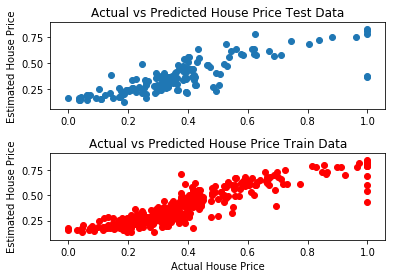

In [37]:
plt.figure(1)
plt.subplot(211)
plt.scatter(y_test, y_test_pred)
plt.title('Actual vs Predicted House Price Test Data')
plt.ylabel('Estimated House Price')
plt.subplots_adjust(hspace=.5)
plt.subplot(212)
plt.scatter(y_train, y_train_pred, color= 'red')
plt.title('Actual vs Predicted House Price Train Data')
plt.xlabel('Actual House Price')
plt.ylabel('Estimated House Price')

In [40]:
model_json = model.to_json()
with open('model.json','w') as json_file:
    json_file.write(model_json)
model.save_weights("model.hdf5")

In [42]:
def get_model():
    model = Sequential()
    model.add(Dense(n_hidden, input_dim=n, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    return model

In [43]:
epochs = [50, 60, 70]
batches = [5, 10, 20]
rmse_min = 0.04
for epoch in epochs:
    for batch in batches:
        model = get_model()
        model.compile(loss='mean_squared_error', optimizer='adam')
        model.fit(X_train, y_train, validation_data=(X_test, y_test),epochs=epoch, batch_size=batch, verbose=1)
        y_test_pred = model.predict(X_test)
        rmse = mean_squared_error( y_test, y_test_pred  )
        if rmse < rmse_min:
            rmse_min = rmse
            # serialize model to JSON
            model_json = model.to_json()
            with open("model.json", "w") as json_file:
                json_file.write(model_json)
            # serialize weights to HDF5
            model.save_weights("model.hdf5")
            print("Saved model to disk")

Train on 354 samples, validate on 152 samples
Epoch 1/50


  5/354 [..............................] - ETA: 32s - loss: 0.0346

145/354 [===========>..................] - ETA: 0s - loss: 0.0347 

300/354 [========================>.....] - ETA: 0s - loss: 0.0392

354/354 [==============================] - 1s 2ms/step - loss: 0.0389 - val_loss: 0.0381


Epoch 2/50
  5/354 [..............................] - ETA: 0s - loss: 0.0319

115/354 [========>.....................] - ETA: 0s - loss: 0.0346

265/354 [=====================>........] - ETA: 0s - loss: 0.0301

354/354 [==============================] - 0s 409us/step - loss: 0.0307 - val_loss: 0.0327


Epoch 3/50
  5/354 [..............................] - ETA: 0s - loss: 0.0091



140/354 [==========>...................] - ETA: 0s - loss: 0.0287

280/354 [======================>.......] - ETA: 0s - loss: 0.0266

354/354 [==============================] - 0s 389us/step - loss: 0.0265 - val_loss: 0.0292


Epoch 4/50
  5/354 [..............................] - ETA: 0s - loss: 0.0128

115/354 [========>.....................] - ETA: 0s - loss: 0.0192

245/354 [===================>..........] - ETA: 0s - loss: 0.0243

354/354 [==============================] - 0s 435us/step - loss: 0.0229 - val_loss: 0.0256


Epoch 5/50
  5/354 [..............................] - ETA: 0s - loss: 0.0443

125/354 [=========>....................] - ETA: 0s - loss: 0.0132

280/354 [======================>.......] - ETA: 0s - loss: 0.0195

354/354 [==============================] - 0s 402us/step - loss: 0.0196 - val_loss: 0.0232


Epoch 6/50
  5/354 [..............................] - ETA: 0s - loss: 0.0035

125/354 [=========>....................] - ETA: 0s - loss: 0.0219

275/354 [======================>.......] - ETA: 0s - loss: 0.0187

354/354 [==============================] - 0s 402us/step - loss: 0.0168 - val_loss: 0.0208


Epoch 7/50
  5/354 [..............................] - ETA: 0s - loss: 0.0036

135/354 [==========>...................] - ETA: 0s - loss: 0.0151

280/354 [======================>.......] - ETA: 0s - loss: 0.0138

354/354 [==============================] - 0s 399us/step - loss: 0.0150 - val_loss: 0.0194


Epoch 8/50
  5/354 [..............................] - ETA: 0s - loss: 0.0110

130/354 [==========>...................] - ETA: 0s - loss: 0.0117

290/354 [=======================>......] - ETA: 0s - loss: 0.0124

354/354 [==============================] - 0s 388us/step - loss: 0.0136 - val_loss: 0.0184


Epoch 9/50
  5/354 [..............................] - ETA: 0s - loss: 0.0093

130/354 [==========>...................] - ETA: 0s - loss: 0.0094

300/354 [========================>.....] - ETA: 0s - loss: 0.0106

354/354 [==============================] - 0s 384us/step - loss: 0.0127 - val_loss: 0.0176


Epoch 10/50
  5/354 [..............................] - ETA: 0s - loss: 0.0215

140/354 [==========>...................] - ETA: 0s - loss: 0.0116

315/354 [=========================>....] - ETA: 0s - loss: 0.0112

354/354 [==============================] - 0s 370us/step - loss: 0.0120 - val_loss: 0.0171


Epoch 11/50
  5/354 [..............................] - ETA: 0s - loss: 0.0085

130/354 [==========>...................] - ETA: 0s - loss: 0.0106

300/354 [========================>.....] - ETA: 0s - loss: 0.0108

354/354 [==============================] - 0s 378us/step - loss: 0.0115 - val_loss: 0.0167


Epoch 12/50
  5/354 [..............................] - ETA: 0s - loss: 0.0074

145/354 [===========>..................] - ETA: 0s - loss: 0.0110

315/354 [=========================>....] - ETA: 0s - loss: 0.0116

354/354 [==============================] - 0s 365us/step - loss: 0.0113 - val_loss: 0.0165


Epoch 13/50
  5/354 [..............................] - ETA: 0s - loss: 0.0017

140/354 [==========>...................] - ETA: 0s - loss: 0.0105

315/354 [=========================>....] - ETA: 0s - loss: 0.0097

354/354 [==============================] - 0s 372us/step - loss: 0.0110 - val_loss: 0.0162


Epoch 14/50
  5/354 [..............................] - ETA: 0s - loss: 0.0070

150/354 [===========>..................] - ETA: 0s - loss: 0.0098

330/354 [==========================>...] - ETA: 0s - loss: 0.0101

354/354 [==============================] - 0s 360us/step - loss: 0.0108 - val_loss: 0.0160


Epoch 15/50
  5/354 [..............................] - ETA: 0s - loss: 0.0062

140/354 [==========>...................] - ETA: 0s - loss: 0.0085

300/354 [========================>.....] - ETA: 0s - loss: 0.0114

354/354 [==============================] - 0s 382us/step - loss: 0.0106 - val_loss: 0.0159


Epoch 16/50
  5/354 [..............................] - ETA: 0s - loss: 0.0054

135/354 [==========>...................] - ETA: 0s - loss: 0.0124

295/354 [========================>.....] - ETA: 0s - loss: 0.0107

354/354 [==============================] - 0s 390us/step - loss: 0.0106 - val_loss: 0.0157


Epoch 17/50
  5/354 [..............................] - ETA: 0s - loss: 0.0024

130/354 [==========>...................] - ETA: 0s - loss: 0.0129

290/354 [=======================>......] - ETA: 0s - loss: 0.0110

354/354 [==============================] - 0s 391us/step - loss: 0.0105 - val_loss: 0.0155


Epoch 18/50
  5/354 [..............................] - ETA: 0s - loss: 0.0028

135/354 [==========>...................] - ETA: 0s - loss: 0.0083

300/354 [========================>.....] - ETA: 0s - loss: 0.0103

354/354 [==============================] - 0s 379us/step - loss: 0.0104 - val_loss: 0.0153


Epoch 19/50
  5/354 [..............................] - ETA: 0s - loss: 0.0020

130/354 [==========>...................] - ETA: 0s - loss: 0.0079

295/354 [========================>.....] - ETA: 0s - loss: 0.0092

354/354 [==============================] - 0s 386us/step - loss: 0.0103 - val_loss: 0.0153


Epoch 20/50
  5/354 [..............................] - ETA: 0s - loss: 7.1612e-04

130/354 [==========>...................] - ETA: 0s - loss: 0.0090    

290/354 [=======================>......] - ETA: 0s - loss: 0.0096

354/354 [==============================] - 0s 391us/step - loss: 0.0102 - val_loss: 0.0151


Epoch 21/50
  5/354 [..............................] - ETA: 0s - loss: 0.0034

135/354 [==========>...................] - ETA: 0s - loss: 0.0099

290/354 [=======================>......] - ETA: 0s - loss: 0.0094

354/354 [==============================] - 0s 391us/step - loss: 0.0101 - val_loss: 0.0150


Epoch 22/50
  5/354 [..............................] - ETA: 0s - loss: 0.0080

135/354 [==========>...................] - ETA: 0s - loss: 0.0112

305/354 [========================>.....] - ETA: 0s - loss: 0.0098

354/354 [==============================] - 0s 375us/step - loss: 0.0100 - val_loss: 0.0149


Epoch 23/50
  5/354 [..............................] - ETA: 0s - loss: 0.0123

135/354 [==========>...................] - ETA: 0s - loss: 0.0115

290/354 [=======================>......] - ETA: 0s - loss: 0.0102

354/354 [==============================] - 0s 388us/step - loss: 0.0101 - val_loss: 0.0148


Epoch 24/50
  5/354 [..............................] - ETA: 0s - loss: 0.0013

130/354 [==========>...................] - ETA: 0s - loss: 0.0089

285/354 [=======================>......] - ETA: 0s - loss: 0.0096

354/354 [==============================] - 0s 389us/step - loss: 0.0099 - val_loss: 0.0146


Epoch 25/50
  5/354 [..............................] - ETA: 0s - loss: 0.0194

130/354 [==========>...................] - ETA: 0s - loss: 0.0099

280/354 [======================>.......] - ETA: 0s - loss: 0.0088

354/354 [==============================] - 0s 400us/step - loss: 0.0098 - val_loss: 0.0147


Epoch 26/50
  5/354 [..............................] - ETA: 0s - loss: 0.0055

125/354 [=========>....................] - ETA: 0s - loss: 0.0089

280/354 [======================>.......] - ETA: 0s - loss: 0.0090

354/354 [==============================] - 0s 397us/step - loss: 0.0098 - val_loss: 0.0145


Epoch 27/50
  5/354 [..............................] - ETA: 0s - loss: 0.0069

135/354 [==========>...................] - ETA: 0s - loss: 0.0115

290/354 [=======================>......] - ETA: 0s - loss: 0.0102

354/354 [==============================] - 0s 391us/step - loss: 0.0097 - val_loss: 0.0145


Epoch 28/50
  5/354 [..............................] - ETA: 0s - loss: 0.0491

130/354 [==========>...................] - ETA: 0s - loss: 0.0128

285/354 [=======================>......] - ETA: 0s - loss: 0.0092

354/354 [==============================] - 0s 394us/step - loss: 0.0097 - val_loss: 0.0144


Epoch 29/50
  5/354 [..............................] - ETA: 0s - loss: 0.0100

135/354 [==========>...................] - ETA: 0s - loss: 0.0135

290/354 [=======================>......] - ETA: 0s - loss: 0.0101

354/354 [==============================] - 0s 392us/step - loss: 0.0096 - val_loss: 0.0149


Epoch 30/50
  5/354 [..............................] - ETA: 0s - loss: 0.0062

135/354 [==========>...................] - ETA: 0s - loss: 0.0112

305/354 [========================>.....] - ETA: 0s - loss: 0.0100

354/354 [==============================] - 0s 379us/step - loss: 0.0097 - val_loss: 0.0144


Epoch 31/50
  5/354 [..............................] - ETA: 0s - loss: 0.0134

140/354 [==========>...................] - ETA: 0s - loss: 0.0069

300/354 [========================>.....] - ETA: 0s - loss: 0.0083

354/354 [==============================] - 0s 386us/step - loss: 0.0095 - val_loss: 0.0142


Epoch 32/50
  5/354 [..............................] - ETA: 0s - loss: 0.0021

135/354 [==========>...................] - ETA: 0s - loss: 0.0060

310/354 [=========================>....] - ETA: 0s - loss: 0.0101

354/354 [==============================] - 0s 373us/step - loss: 0.0095 - val_loss: 0.0142


Epoch 33/50
  5/354 [..............................] - ETA: 0s - loss: 0.0173

130/354 [==========>...................] - ETA: 0s - loss: 0.0104

285/354 [=======================>......] - ETA: 0s - loss: 0.0104

354/354 [==============================] - 0s 399us/step - loss: 0.0095 - val_loss: 0.0142


Epoch 34/50
  5/354 [..............................] - ETA: 0s - loss: 0.0121

130/354 [==========>...................] - ETA: 0s - loss: 0.0071

290/354 [=======================>......] - ETA: 0s - loss: 0.0084

354/354 [==============================] - 0s 395us/step - loss: 0.0094 - val_loss: 0.0141


Epoch 35/50
  5/354 [..............................] - ETA: 0s - loss: 0.0060

140/354 [==========>...................] - ETA: 0s - loss: 0.0093

305/354 [========================>.....] - ETA: 0s - loss: 0.0091

354/354 [==============================] - 0s 382us/step - loss: 0.0094 - val_loss: 0.0141


Epoch 36/50
  5/354 [..............................] - ETA: 0s - loss: 0.0227

135/354 [==========>...................] - ETA: 0s - loss: 0.0091

295/354 [========================>.....] - ETA: 0s - loss: 0.0099

354/354 [==============================] - 0s 387us/step - loss: 0.0093 - val_loss: 0.0141


Epoch 37/50
  5/354 [..............................] - ETA: 0s - loss: 0.0012

130/354 [==========>...................] - ETA: 0s - loss: 0.0090

290/354 [=======================>......] - ETA: 0s - loss: 0.0098

354/354 [==============================] - 0s 393us/step - loss: 0.0094 - val_loss: 0.0141


Epoch 38/50
  5/354 [..............................] - ETA: 0s - loss: 0.0228

135/354 [==========>...................] - ETA: 0s - loss: 0.0072

295/354 [========================>.....] - ETA: 0s - loss: 0.0099

354/354 [==============================] - 0s 389us/step - loss: 0.0093 - val_loss: 0.0140


Epoch 39/50
  5/354 [..............................] - ETA: 0s - loss: 0.0069

130/354 [==========>...................] - ETA: 0s - loss: 0.0121

285/354 [=======================>......] - ETA: 0s - loss: 0.0096

354/354 [==============================] - 0s 394us/step - loss: 0.0092 - val_loss: 0.0140


Epoch 40/50
  5/354 [..............................] - ETA: 0s - loss: 0.0025

135/354 [==========>...................] - ETA: 0s - loss: 0.0081

290/354 [=======================>......] - ETA: 0s - loss: 0.0096

354/354 [==============================] - 0s 395us/step - loss: 0.0092 - val_loss: 0.0139


Epoch 41/50
  5/354 [..............................] - ETA: 0s - loss: 9.5662e-04

135/354 [==========>...................] - ETA: 0s - loss: 0.0074    

295/354 [========================>.....] - ETA: 0s - loss: 0.0093

354/354 [==============================] - 0s 389us/step - loss: 0.0092 - val_loss: 0.0139


Epoch 42/50
  5/354 [..............................] - ETA: 0s - loss: 0.0015

135/354 [==========>...................] - ETA: 0s - loss: 0.0096

295/354 [========================>.....] - ETA: 0s - loss: 0.0098

354/354 [==============================] - 0s 389us/step - loss: 0.0091 - val_loss: 0.0139


Epoch 43/50
  5/354 [..............................] - ETA: 0s - loss: 0.0047

135/354 [==========>...................] - ETA: 0s - loss: 0.0065

295/354 [========================>.....] - ETA: 0s - loss: 0.0092

354/354 [==============================] - 0s 391us/step - loss: 0.0091 - val_loss: 0.0138


Epoch 44/50
  5/354 [..............................] - ETA: 0s - loss: 0.0074

130/354 [==========>...................] - ETA: 0s - loss: 0.0092

295/354 [========================>.....] - ETA: 0s - loss: 0.0087

354/354 [==============================] - 0s 382us/step - loss: 0.0090 - val_loss: 0.0137


Epoch 45/50
  5/354 [..............................] - ETA: 0s - loss: 0.0057

135/354 [==========>...................] - ETA: 0s - loss: 0.0099

295/354 [========================>.....] - ETA: 0s - loss: 0.0087

354/354 [==============================] - 0s 391us/step - loss: 0.0091 - val_loss: 0.0137


Epoch 46/50
  5/354 [..............................] - ETA: 0s - loss: 0.0046

135/354 [==========>...................] - ETA: 0s - loss: 0.0068

290/354 [=======================>......] - ETA: 0s - loss: 0.0086

354/354 [==============================] - 0s 391us/step - loss: 0.0090 - val_loss: 0.0138


Epoch 47/50
  5/354 [..............................] - ETA: 0s - loss: 0.0034

135/354 [==========>...................] - ETA: 0s - loss: 0.0106

290/354 [=======================>......] - ETA: 0s - loss: 0.0087

354/354 [==============================] - 0s 393us/step - loss: 0.0090 - val_loss: 0.0136


Epoch 48/50
  5/354 [..............................] - ETA: 0s - loss: 0.0064

145/354 [===========>..................] - ETA: 0s - loss: 0.0101

330/354 [==========================>...] - ETA: 0s - loss: 0.0092

354/354 [==============================] - 0s 362us/step - loss: 0.0090 - val_loss: 0.0136


Epoch 49/50
  5/354 [..............................] - ETA: 0s - loss: 0.0093

140/354 [==========>...................] - ETA: 0s - loss: 0.0125

320/354 [==========================>...] - ETA: 0s - loss: 0.0092

354/354 [==============================] - 0s 369us/step - loss: 0.0090 - val_loss: 0.0137


Epoch 50/50
  5/354 [..............................] - ETA: 0s - loss: 0.0257

140/354 [==========>...................] - ETA: 0s - loss: 0.0079

305/354 [========================>.....] - ETA: 0s - loss: 0.0093

354/354 [==============================] - 0s 382us/step - loss: 0.0090 - val_loss: 0.0136


Saved model to disk

Train on 354 samples, validate on 152 samples
Epoch 1/50


 10/354 [..............................] - ETA: 8s - loss: 0.0499

310/354 [=========================>....] - ETA: 0s - loss: 0.0357

354/354 [==============================] - 0s 949us/step - loss: 0.0345 - val_loss: 0.0335


Epoch 2/50
 10/354 [..............................] - ETA: 0s - loss: 0.0231

250/354 [====================>.........] - ETA: 0s - loss: 0.0295

354/354 [==============================] - 0s 233us/step - loss: 0.0272 - val_loss: 0.0292


Epoch 3/50
 10/354 [..............................] - ETA: 0s - loss: 0.0339

250/354 [====================>.........] - ETA: 0s - loss: 0.0259

354/354 [==============================] - 0s 230us/step - loss: 0.0235 - val_loss: 0.0265


Epoch 4/50
 10/354 [..............................] - ETA: 0s - loss: 0.0406

280/354 [======================>.......] - ETA: 0s - loss: 0.0191

354/354 [==============================] - 0s 217us/step - loss: 0.0204 - val_loss: 0.0239


Epoch 5/50
 10/354 [..............................] - ETA: 0s - loss: 0.0533

250/354 [====================>.........] - ETA: 0s - loss: 0.0202

354/354 [==============================] - 0s 230us/step - loss: 0.0178 - val_loss: 0.0221


Epoch 6/50
 10/354 [..............................] - ETA: 0s - loss: 0.0204

280/354 [======================>.......] - ETA: 0s - loss: 0.0162

354/354 [==============================] - 0s 221us/step - loss: 0.0158 - val_loss: 0.0206


Epoch 7/50
 10/354 [..............................] - ETA: 0s - loss: 0.0095

270/354 [=====================>........] - ETA: 0s - loss: 0.0143

354/354 [==============================] - 0s 215us/step - loss: 0.0145 - val_loss: 0.0196


Epoch 8/50
 10/354 [..............................] - ETA: 0s - loss: 0.0210

260/354 [=====================>........] - ETA: 0s - loss: 0.0156

354/354 [==============================] - 0s 224us/step - loss: 0.0135 - val_loss: 0.0188


Epoch 9/50
 10/354 [..............................] - ETA: 0s - loss: 0.0099

260/354 [=====================>........] - ETA: 0s - loss: 0.0126

354/354 [==============================] - 0s 226us/step - loss: 0.0127 - val_loss: 0.0182


Epoch 10/50
 10/354 [..............................] - ETA: 0s - loss: 0.0112

240/354 [===================>..........] - ETA: 0s - loss: 0.0140

354/354 [==============================] - 0s 236us/step - loss: 0.0122 - val_loss: 0.0177


Epoch 11/50
 10/354 [..............................] - ETA: 0s - loss: 0.0026

260/354 [=====================>........] - ETA: 0s - loss: 0.0092

354/354 [==============================] - 0s 225us/step - loss: 0.0117 - val_loss: 0.0173


Epoch 12/50
 10/354 [..............................] - ETA: 0s - loss: 0.0059

260/354 [=====================>........] - ETA: 0s - loss: 0.0114

354/354 [==============================] - 0s 221us/step - loss: 0.0115 - val_loss: 0.0170


Epoch 13/50
 10/354 [..............................] - ETA: 0s - loss: 0.0100

270/354 [=====================>........] - ETA: 0s - loss: 0.0117

354/354 [==============================] - 0s 217us/step - loss: 0.0111 - val_loss: 0.0168


Epoch 14/50
 10/354 [..............................] - ETA: 0s - loss: 0.0089

270/354 [=====================>........] - ETA: 0s - loss: 0.0118

354/354 [==============================] - 0s 222us/step - loss: 0.0110 - val_loss: 0.0165


Epoch 15/50
 10/354 [..............................] - ETA: 0s - loss: 0.0077

260/354 [=====================>........] - ETA: 0s - loss: 0.0101

354/354 [==============================] - 0s 221us/step - loss: 0.0108 - val_loss: 0.0163


Epoch 16/50
 10/354 [..............................] - ETA: 0s - loss: 0.0044

250/354 [====================>.........] - ETA: 0s - loss: 0.0104

354/354 [==============================] - 0s 228us/step - loss: 0.0106 - val_loss: 0.0160


Epoch 17/50
 10/354 [..............................] - ETA: 0s - loss: 0.0264

250/354 [====================>.........] - ETA: 0s - loss: 0.0115

354/354 [==============================] - 0s 229us/step - loss: 0.0104 - val_loss: 0.0159


Epoch 18/50
 10/354 [..............................] - ETA: 0s - loss: 0.0140

260/354 [=====================>........] - ETA: 0s - loss: 0.0087

354/354 [==============================] - 0s 235us/step - loss: 0.0104 - val_loss: 0.0157


Epoch 19/50
 10/354 [..............................] - ETA: 0s - loss: 0.0085

240/354 [===================>..........] - ETA: 0s - loss: 0.0105

354/354 [==============================] - 0s 237us/step - loss: 0.0103 - val_loss: 0.0156


Epoch 20/50
 10/354 [..............................] - ETA: 0s - loss: 0.0057

250/354 [====================>.........] - ETA: 0s - loss: 0.0091

354/354 [==============================] - 0s 235us/step - loss: 0.0102 - val_loss: 0.0154


Epoch 21/50
 10/354 [..............................] - ETA: 0s - loss: 0.0047

250/354 [====================>.........] - ETA: 0s - loss: 0.0094

354/354 [==============================] - 0s 229us/step - loss: 0.0101 - val_loss: 0.0153


Epoch 22/50


 10/354 [..............................] - ETA: 0s - loss: 0.0052

250/354 [====================>.........] - ETA: 0s - loss: 0.0104

354/354 [==============================] - 0s 240us/step - loss: 0.0100 - val_loss: 0.0152


Epoch 23/50
 10/354 [..............................] - ETA: 0s - loss: 0.0046

240/354 [===================>..........] - ETA: 0s - loss: 0.0108



354/354 [==============================] - 0s 239us/step - loss: 0.0099 - val_loss: 0.0151


Epoch 24/50
 10/354 [..............................] - ETA: 0s - loss: 0.0052

270/354 [=====================>........] - ETA: 0s - loss: 0.0082



354/354 [==============================] - 0s 232us/step - loss: 0.0098 - val_loss: 0.0150


Epoch 25/50
 10/354 [..............................] - ETA: 0s - loss: 0.0101

270/354 [=====================>........] - ETA: 0s - loss: 0.0081



354/354 [==============================] - 0s 236us/step - loss: 0.0099 - val_loss: 0.0149


Epoch 26/50
 10/354 [..............................] - ETA: 0s - loss: 0.0064

280/354 [======================>.......] - ETA: 0s - loss: 0.0105

354/354 [==============================] - 0s 224us/step - loss: 0.0097 - val_loss: 0.0147


Epoch 27/50
 10/354 [..............................] - ETA: 0s - loss: 0.0055

240/354 [===================>..........] - ETA: 0s - loss: 0.0100

354/354 [==============================] - 0s 251us/step - loss: 0.0097 - val_loss: 0.0147


Epoch 28/50
 10/354 [..............................] - ETA: 0s - loss: 0.0041

280/354 [======================>.......] - ETA: 0s - loss: 0.0103

354/354 [==============================] - 0s 221us/step - loss: 0.0096 - val_loss: 0.0146


Epoch 29/50
 10/354 [..............................] - ETA: 0s - loss: 0.0042

280/354 [======================>.......] - ETA: 0s - loss: 0.0109

354/354 [==============================] - 0s 214us/step - loss: 0.0097 - val_loss: 0.0147


Epoch 30/50
 10/354 [..............................] - ETA: 0s - loss: 0.0058

270/354 [=====================>........] - ETA: 0s - loss: 0.0103

354/354 [==============================] - 0s 217us/step - loss: 0.0095 - val_loss: 0.0144


Epoch 31/50
 10/354 [..............................] - ETA: 0s - loss: 0.0055

290/354 [=======================>......] - ETA: 0s - loss: 0.0094

354/354 [==============================] - 0s 209us/step - loss: 0.0095 - val_loss: 0.0144


Epoch 32/50
 10/354 [..............................] - ETA: 0s - loss: 0.0082

270/354 [=====================>........] - ETA: 0s - loss: 0.0095

354/354 [==============================] - 0s 214us/step - loss: 0.0096 - val_loss: 0.0144


Epoch 33/50
 10/354 [..............................] - ETA: 0s - loss: 0.0068

270/354 [=====================>........] - ETA: 0s - loss: 0.0075

354/354 [==============================] - 0s 217us/step - loss: 0.0095 - val_loss: 0.0143


Epoch 34/50
 10/354 [..............................] - ETA: 0s - loss: 0.0078

270/354 [=====================>........] - ETA: 0s - loss: 0.0095

354/354 [==============================] - 0s 217us/step - loss: 0.0095 - val_loss: 0.0142


Epoch 35/50
 10/354 [..............................] - ETA: 0s - loss: 0.0066

270/354 [=====================>........] - ETA: 0s - loss: 0.0096

354/354 [==============================] - 0s 220us/step - loss: 0.0094 - val_loss: 0.0142


Epoch 36/50
 10/354 [..............................] - ETA: 0s - loss: 0.0044

280/354 [======================>.......] - ETA: 0s - loss: 0.0094

354/354 [==============================] - 0s 222us/step - loss: 0.0093 - val_loss: 0.0143


Epoch 37/50
 10/354 [..............................] - ETA: 0s - loss: 0.0113

280/354 [======================>.......] - ETA: 0s - loss: 0.0081

354/354 [==============================] - 0s 214us/step - loss: 0.0093 - val_loss: 0.0141


Epoch 38/50
 10/354 [..............................] - ETA: 0s - loss: 0.0039

280/354 [======================>.......] - ETA: 0s - loss: 0.0079

354/354 [==============================] - 0s 223us/step - loss: 0.0093 - val_loss: 0.0141


Epoch 39/50
 10/354 [..............................] - ETA: 0s - loss: 0.0033

270/354 [=====================>........] - ETA: 0s - loss: 0.0101

354/354 [==============================] - 0s 216us/step - loss: 0.0092 - val_loss: 0.0141


Epoch 40/50
 10/354 [..............................] - ETA: 0s - loss: 0.0079

280/354 [======================>.......] - ETA: 0s - loss: 0.0076

354/354 [==============================] - 0s 218us/step - loss: 0.0092 - val_loss: 0.0140


Epoch 41/50
 10/354 [..............................] - ETA: 0s - loss: 0.0052

280/354 [======================>.......] - ETA: 0s - loss: 0.0087

354/354 [==============================] - 0s 213us/step - loss: 0.0092 - val_loss: 0.0139


Epoch 42/50
 10/354 [..............................] - ETA: 0s - loss: 0.0185

280/354 [======================>.......] - ETA: 0s - loss: 0.0097

354/354 [==============================] - 0s 210us/step - loss: 0.0091 - val_loss: 0.0140


Epoch 43/50
 10/354 [..............................] - ETA: 0s - loss: 0.0125

270/354 [=====================>........] - ETA: 0s - loss: 0.0100

354/354 [==============================] - 0s 218us/step - loss: 0.0094 - val_loss: 0.0139


Epoch 44/50
 10/354 [..............................] - ETA: 0s - loss: 0.0106

280/354 [======================>.......] - ETA: 0s - loss: 0.0100

354/354 [==============================] - 0s 207us/step - loss: 0.0092 - val_loss: 0.0138


Epoch 45/50
 10/354 [..............................] - ETA: 0s - loss: 0.0066

270/354 [=====================>........] - ETA: 0s - loss: 0.0100

354/354 [==============================] - 0s 220us/step - loss: 0.0091 - val_loss: 0.0138


Epoch 46/50
 10/354 [..............................] - ETA: 0s - loss: 0.0276

280/354 [======================>.......] - ETA: 0s - loss: 0.0097

354/354 [==============================] - 0s 217us/step - loss: 0.0090 - val_loss: 0.0138


Epoch 47/50
 10/354 [..............................] - ETA: 0s - loss: 0.0102

280/354 [======================>.......] - ETA: 0s - loss: 0.0092

354/354 [==============================] - 0s 214us/step - loss: 0.0090 - val_loss: 0.0137


Epoch 48/50
 10/354 [..............................] - ETA: 0s - loss: 0.0135

270/354 [=====================>........] - ETA: 0s - loss: 0.0098

354/354 [==============================] - 0s 217us/step - loss: 0.0091 - val_loss: 0.0137


Epoch 49/50
 10/354 [..............................] - ETA: 0s - loss: 0.0100

280/354 [======================>.......] - ETA: 0s - loss: 0.0091

354/354 [==============================] - 0s 216us/step - loss: 0.0090 - val_loss: 0.0136


Epoch 50/50
 10/354 [..............................] - ETA: 0s - loss: 0.0136

270/354 [=====================>........] - ETA: 0s - loss: 0.0083

354/354 [==============================] - 0s 213us/step - loss: 0.0090 - val_loss: 0.0138


Train on 354 samples, validate on 152 samples
Epoch 1/50


 20/354 [>.............................] - ETA: 4s - loss: 0.0899

354/354 [==============================] - 0s 863us/step - loss: 0.0913 - val_loss: 0.0895


Epoch 2/50
 20/354 [>.............................] - ETA: 0s - loss: 0.0738

354/354 [==============================] - 0s 112us/step - loss: 0.0716 - val_loss: 0.0709


Epoch 3/50
 20/354 [>.............................] - ETA: 0s - loss: 0.0200

354/354 [==============================] - 0s 123us/step - loss: 0.0574 - val_loss: 0.0581


Epoch 4/50
 20/354 [>.............................] - ETA: 0s - loss: 0.1011

354/354 [==============================] - 0s 117us/step - loss: 0.0484 - val_loss: 0.0495


Epoch 5/50
 20/354 [>.............................] - ETA: 0s - loss: 0.0524

354/354 [==============================] - 0s 131us/step - loss: 0.0425 - val_loss: 0.0437


Epoch 6/50
 20/354 [>.............................] - ETA: 0s - loss: 0.0504

354/354 [==============================] - 0s 109us/step - loss: 0.0385 - val_loss: 0.0397


Epoch 7/50
 20/354 [>.............................] - ETA: 0s - loss: 0.0380

354/354 [==============================] - 0s 129us/step - loss: 0.0356 - val_loss: 0.0369


Epoch 8/50
 20/354 [>.............................] - ETA: 0s - loss: 0.0370

354/354 [==============================] - 0s 121us/step - loss: 0.0334 - val_loss: 0.0348


Epoch 9/50
 20/354 [>.............................] - ETA: 0s - loss: 0.0356

354/354 [==============================] - 0s 120us/step - loss: 0.0314 - val_loss: 0.0330


Epoch 10/50
 20/354 [>.............................] - ETA: 0s - loss: 0.0155

354/354 [==============================] - 0s 112us/step - loss: 0.0296 - val_loss: 0.0313


Epoch 11/50
 20/354 [>.............................] - ETA: 0s - loss: 0.0361

354/354 [==============================] - 0s 103us/step - loss: 0.0279 - val_loss: 0.0296


Epoch 12/50
 20/354 [>.............................] - ETA: 0s - loss: 0.0163

354/354 [==============================] - 0s 117us/step - loss: 0.0260 - val_loss: 0.0280


Epoch 13/50
 20/354 [>.............................] - ETA: 0s - loss: 0.0199

354/354 [==============================] - 0s 118us/step - loss: 0.0244 - val_loss: 0.0266


Epoch 14/50
 20/354 [>.............................] - ETA: 0s - loss: 0.0115

354/354 [==============================] - 0s 117us/step - loss: 0.0228 - val_loss: 0.0252


Epoch 15/50
 20/354 [>.............................] - ETA: 0s - loss: 0.0086

354/354 [==============================] - 0s 119us/step - loss: 0.0213 - val_loss: 0.0240


Epoch 16/50
 20/354 [>.............................] - ETA: 0s - loss: 0.0110

354/354 [==============================] - 0s 117us/step - loss: 0.0200 - val_loss: 0.0228


Epoch 17/50
 20/354 [>.............................] - ETA: 0s - loss: 0.0261

354/354 [==============================] - 0s 128us/step - loss: 0.0188 - val_loss: 0.0217


Epoch 18/50
 20/354 [>.............................] - ETA: 0s - loss: 0.0407

354/354 [==============================] - 0s 111us/step - loss: 0.0176 - val_loss: 0.0209


Epoch 19/50
 20/354 [>.............................] - ETA: 0s - loss: 0.0129

354/354 [==============================] - 0s 115us/step - loss: 0.0166 - val_loss: 0.0201


Epoch 20/50
 20/354 [>.............................] - ETA: 0s - loss: 0.0240

354/354 [==============================] - 0s 122us/step - loss: 0.0157 - val_loss: 0.0194


Epoch 21/50
 20/354 [>.............................] - ETA: 0s - loss: 0.0151

354/354 [==============================] - 0s 114us/step - loss: 0.0149 - val_loss: 0.0187


Epoch 22/50
 20/354 [>.............................] - ETA: 0s - loss: 0.0205

354/354 [==============================] - 0s 116us/step - loss: 0.0142 - val_loss: 0.0181


Epoch 23/50
 20/354 [>.............................] - ETA: 0s - loss: 0.0098

354/354 [==============================] - 0s 120us/step - loss: 0.0136 - val_loss: 0.0177


Epoch 24/50
 20/354 [>.............................] - ETA: 0s - loss: 0.0109

354/354 [==============================] - 0s 118us/step - loss: 0.0130 - val_loss: 0.0173


Epoch 25/50
 20/354 [>.............................] - ETA: 0s - loss: 0.0105

354/354 [==============================] - 0s 147us/step - loss: 0.0126 - val_loss: 0.0170


Epoch 26/50
 20/354 [>.............................] - ETA: 0s - loss: 0.0072

354/354 [==============================] - 0s 122us/step - loss: 0.0122 - val_loss: 0.0167


Epoch 27/50
 20/354 [>.............................] - ETA: 0s - loss: 0.0231

354/354 [==============================] - 0s 112us/step - loss: 0.0119 - val_loss: 0.0164


Epoch 28/50
 20/354 [>.............................] - ETA: 0s - loss: 0.0053

354/354 [==============================] - 0s 118us/step - loss: 0.0116 - val_loss: 0.0162


Epoch 29/50
 20/354 [>.............................] - ETA: 0s - loss: 0.0055

354/354 [==============================] - 0s 119us/step - loss: 0.0113 - val_loss: 0.0161


Epoch 30/50
 20/354 [>.............................] - ETA: 0s - loss: 0.0107

354/354 [==============================] - 0s 113us/step - loss: 0.0111 - val_loss: 0.0159


Epoch 31/50
 20/354 [>.............................] - ETA: 0s - loss: 0.0155

354/354 [==============================] - 0s 111us/step - loss: 0.0109 - val_loss: 0.0159


Epoch 32/50
 20/354 [>.............................] - ETA: 0s - loss: 0.0210

354/354 [==============================] - 0s 120us/step - loss: 0.0108 - val_loss: 0.0157


Epoch 33/50
 20/354 [>.............................] - ETA: 0s - loss: 0.0203

354/354 [==============================] - 0s 108us/step - loss: 0.0107 - val_loss: 0.0157


Epoch 34/50
 20/354 [>.............................] - ETA: 0s - loss: 0.0054

354/354 [==============================] - 0s 118us/step - loss: 0.0105 - val_loss: 0.0156


Epoch 35/50
 20/354 [>.............................] - ETA: 0s - loss: 0.0099

354/354 [==============================] - 0s 110us/step - loss: 0.0105 - val_loss: 0.0155


Epoch 36/50
 20/354 [>.............................] - ETA: 0s - loss: 0.0073

354/354 [==============================] - 0s 109us/step - loss: 0.0104 - val_loss: 0.0155


Epoch 37/50
 20/354 [>.............................] - ETA: 0s - loss: 0.0046

354/354 [==============================] - 0s 108us/step - loss: 0.0103 - val_loss: 0.0155


Epoch 38/50
 20/354 [>.............................] - ETA: 0s - loss: 0.0083

354/354 [==============================] - 0s 108us/step - loss: 0.0103 - val_loss: 0.0155


Epoch 39/50
 20/354 [>.............................] - ETA: 0s - loss: 0.0029

354/354 [==============================] - 0s 124us/step - loss: 0.0102 - val_loss: 0.0154


Epoch 40/50
 20/354 [>.............................] - ETA: 0s - loss: 0.0057

354/354 [==============================] - 0s 120us/step - loss: 0.0101 - val_loss: 0.0154


Epoch 41/50
 20/354 [>.............................] - ETA: 0s - loss: 0.0093

354/354 [==============================] - 0s 133us/step - loss: 0.0101 - val_loss: 0.0154


Epoch 42/50
 20/354 [>.............................] - ETA: 0s - loss: 0.0087

354/354 [==============================] - 0s 115us/step - loss: 0.0101 - val_loss: 0.0154


Epoch 43/50
 20/354 [>.............................] - ETA: 0s - loss: 0.0052

354/354 [==============================] - 0s 106us/step - loss: 0.0101 - val_loss: 0.0154


Epoch 44/50
 20/354 [>.............................] - ETA: 0s - loss: 0.0067

354/354 [==============================] - 0s 105us/step - loss: 0.0100 - val_loss: 0.0153


Epoch 45/50
 20/354 [>.............................] - ETA: 0s - loss: 0.0114

354/354 [==============================] - 0s 117us/step - loss: 0.0100 - val_loss: 0.0154


Epoch 46/50
 20/354 [>.............................] - ETA: 0s - loss: 0.0066

354/354 [==============================] - 0s 119us/step - loss: 0.0100 - val_loss: 0.0153


Epoch 47/50
 20/354 [>.............................] - ETA: 0s - loss: 0.0038

354/354 [==============================] - 0s 115us/step - loss: 0.0099 - val_loss: 0.0153


Epoch 48/50
 20/354 [>.............................] - ETA: 0s - loss: 0.0070

354/354 [==============================] - 0s 104us/step - loss: 0.0099 - val_loss: 0.0153


Epoch 49/50
 20/354 [>.............................] - ETA: 0s - loss: 0.0073

354/354 [==============================] - 0s 114us/step - loss: 0.0099 - val_loss: 0.0153


Epoch 50/50
 20/354 [>.............................] - ETA: 0s - loss: 0.0040

354/354 [==============================] - 0s 116us/step - loss: 0.0099 - val_loss: 0.0153


Train on 354 samples, validate on 152 samples
Epoch 1/60


  5/354 [..............................] - ETA: 20s - loss: 0.0462

155/354 [============>.................] - ETA: 0s - loss: 0.0406 

310/354 [=========================>....] - ETA: 0s - loss: 0.0369

354/354 [==============================] - 0s 1ms/step - loss: 0.0348 - val_loss: 0.0298


Epoch 2/60
  5/354 [..............................] - ETA: 0s - loss: 9.5816e-04

140/354 [==========>...................] - ETA: 0s - loss: 0.0287    

290/354 [=======================>......] - ETA: 0s - loss: 0.0257

354/354 [==============================] - 0s 394us/step - loss: 0.0234 - val_loss: 0.0241


Epoch 3/60
  5/354 [..............................] - ETA: 0s - loss: 0.0054

145/354 [===========>..................] - ETA: 0s - loss: 0.0244

290/354 [=======================>......] - ETA: 0s - loss: 0.0193

354/354 [==============================] - 0s 406us/step - loss: 0.0190 - val_loss: 0.0212


Epoch 4/60
  5/354 [..............................] - ETA: 0s - loss: 0.0254



150/354 [===========>..................]

 - ETA: 0s - loss: 0.0187

295/354 [========================>.....] - ETA: 0s - loss: 0.0171

354/354 [==============================] - 0s 406us/step - loss: 0.0162 - val_loss: 0.0190


Epoch 5/60
  5/354 [..............................] - ETA: 0s - loss: 0.0648

165/354 [============>.................] - ETA: 0s - loss: 0.0170

330/354 [==========================>...] - ETA: 0s - loss: 0.0141

354/354 [==============================] - 0s 353us/step - loss: 0.0142 - val_loss: 0.0179


Epoch 6/60
  5/354 [..............................] - ETA: 0s - loss: 0.0023

160/354 [============>.................] - ETA: 0s - loss: 0.0103

300/354 [========================>.....] - ETA: 0s - loss: 0.0133

354/354 [==============================] - 0s 393us/step - loss: 0.0128 - val_loss: 0.0168


Epoch 7/60
  5/354 [..............................] - ETA: 0s - loss: 0.0081

160/354 [============>.................] - ETA: 0s - loss: 0.0077

305/354 [========================>.....] - ETA: 0s - loss: 0.0122

354/354 [==============================] - 0s 391us/step - loss: 0.0119 - val_loss: 0.0162


Epoch 8/60
  5/354 [..............................] - ETA: 0s - loss: 0.0018

160/354 [============>.................] - ETA: 0s - loss: 0.0076

305/354 [========================>.....] - ETA: 0s - loss: 0.0117

354/354 [==============================] - 0s 385us/step - loss: 0.0113 - val_loss: 0.0159


Epoch 9/60
  5/354 [..............................] - ETA: 0s - loss: 0.0342

145/354 [===========>..................] - ETA: 0s - loss: 0.0139

290/354 [=======================>......] - ETA: 0s - loss: 0.0116

354/354 [==============================] - 0s 397us/step - loss: 0.0109 - val_loss: 0.0159


Epoch 10/60
  5/354 [..............................] - ETA: 0s - loss: 0.0179

140/354 [==========>...................] - ETA: 0s - loss: 0.0118

285/354 [=======================>......] - ETA: 0s - loss: 0.0108

354/354 [==============================] - 0s 396us/step - loss: 0.0107 - val_loss: 0.0156


Epoch 11/60
  5/354 [..............................] - ETA: 0s - loss: 0.0462

150/354 [===========>..................] - ETA: 0s - loss: 0.0091

295/354 [========================>.....] - ETA: 0s - loss: 0.0109

354/354 [==============================] - 0s 389us/step - loss: 0.0106 - val_loss: 0.0154


Epoch 12/60
  5/354 [..............................] - ETA: 0s - loss: 0.0018

150/354 [===========>..................] - ETA: 0s - loss: 0.0086

300/354 [========================>.....] - ETA: 0s - loss: 0.0111

354/354 [==============================] - 0s 392us/step - loss: 0.0105 - val_loss: 0.0154


Epoch 13/60
  5/354 [..............................] - ETA: 0s - loss: 0.0017

145/354 [===========>..................] - ETA: 0s - loss: 0.0096

290/354 [=======================>......] - ETA: 0s - loss: 0.0109

354/354 [==============================] - 0s 397us/step - loss: 0.0104 - val_loss: 0.0153


Epoch 14/60
  5/354 [..............................] - ETA: 0s - loss: 0.0044

145/354 [===========>..................] - ETA: 0s - loss: 0.0074

295/354 [========================>.....] - ETA: 0s - loss: 0.0102

354/354 [==============================] - 0s 393us/step - loss: 0.0102 - val_loss: 0.0152


Epoch 15/60
  5/354 [..............................] - ETA: 0s - loss: 0.0081

150/354 [===========>..................] - ETA: 0s - loss: 0.0100

285/354 [=======================>......] - ETA: 0s - loss: 0.0100

354/354 [==============================] - 0s 403us/step - loss: 0.0101 - val_loss: 0.0150


Epoch 16/60
  5/354 [..............................] - ETA: 0s - loss: 0.0023

145/354 [===========>..................] - ETA: 0s - loss: 0.0089

295/354 [========================>.....] - ETA: 0s - loss: 0.0093

354/354 [==============================] - 0s 389us/step - loss: 0.0101 - val_loss: 0.0150


Epoch 17/60
  5/354 [..............................] - ETA: 0s - loss: 9.7647e-04

145/354 [===========>..................] - ETA: 0s - loss: 0.0077    

290/354 [=======================>......] - ETA: 0s - loss: 0.0096

354/354 [==============================] - 0s 400us/step - loss: 0.0100 - val_loss: 0.0148


Epoch 18/60
  5/354 [..............................] - ETA: 0s - loss: 0.0036

145/354 [===========>..................] - ETA: 0s - loss: 0.0081

300/354 [========================>.....] - ETA: 0s - loss: 0.0099

354/354 [==============================] - 0s 390us/step - loss: 0.0100 - val_loss: 0.0149


Epoch 19/60
  5/354 [..............................] - ETA: 0s - loss: 0.0153

160/354 [============>.................] - ETA: 0s - loss: 0.0081

345/354 [============================>.] - ETA: 0s - loss: 0.0101

354/354 [==============================] - 0s 345us/step - loss: 0.0099 - val_loss: 0.0148


Epoch 20/60
  5/354 [..............................] - ETA: 0s - loss: 0.0299

155/354 [============>.................] - ETA: 0s - loss: 0.0097

300/354 [========================>.....] - ETA: 0s - loss: 0.0098

354/354 [==============================] - 0s 383us/step - loss: 0.0098 - val_loss: 0.0147


Epoch 21/60
  5/354 [..............................] - ETA: 0s - loss: 0.0023

170/354 [=============>................] - ETA: 0s - loss: 0.0090

315/354 [=========================>....] - ETA: 0s - loss: 0.0097

354/354 [==============================] - 0s 370us/step - loss: 0.0098 - val_loss: 0.0147


Epoch 22/60
  5/354 [..............................] - ETA: 0s - loss: 0.0093

170/354 [=============>................] - ETA: 0s - loss: 0.0106

330/354 [==========================>...] - ETA: 0s - loss: 0.0102

354/354 [==============================] - 0s 369us/step - loss: 0.0097 - val_loss: 0.0148


Epoch 23/60
  5/354 [..............................] - ETA: 0s - loss: 0.0075

160/354 [============>.................] - ETA: 0s - loss: 0.0083

300/354 [========================>.....] - ETA: 0s - loss: 0.0089

354/354 [==============================] - 0s 392us/step - loss: 0.0096 - val_loss: 0.0145


Epoch 24/60
  5/354 [..............................] - ETA: 0s - loss: 0.0092

155/354 [============>.................] - ETA: 0s - loss: 0.0067

290/354 [=======================>......] - ETA: 0s - loss: 0.0090

354/354 [==============================] - 0s 404us/step - loss: 0.0098 - val_loss: 0.0144


Epoch 25/60
  5/354 [..............................] - ETA: 0s - loss: 0.0067



150/354 [===========>..................] - ETA: 0s - loss: 0.0101

290/354 [=======================>......] - ETA: 0s - loss: 0.0098

354/354 [==============================] - 0s 404us/step - loss: 0.0096 - val_loss: 0.0147


Epoch 26/60
  5/354 [..............................] - ETA: 0s - loss: 0.0049

150/354 [===========>..................] - ETA: 0s - loss: 0.0088

285/354 [=======================>......] - ETA: 0s - loss: 0.0098

354/354 [==============================] - 0s 420us/step - loss: 0.0095 - val_loss: 0.0142


Epoch 27/60
  5/354 [..............................] - ETA: 0s - loss: 0.0127

150/354 [===========>..................] - ETA: 0s - loss: 0.0098



305/354 [========================>.....] - ETA: 0s - loss: 0.0088

354/354 [==============================] - 0s 387us/step - loss: 0.0095 - val_loss: 0.0143


Epoch 28/60
  5/354 [..............................] - ETA: 0s - loss: 0.0172

145/354 [===========>..................] - ETA: 0s - loss: 0.0117

285/354 [=======================>......] - ETA: 0s - loss: 0.0100

354/354 [==============================] - 0s 400us/step - loss: 0.0095 - val_loss: 0.0144


Epoch 29/60
  5/354 [..............................] - ETA: 0s - loss: 0.0215

155/354 [============>.................] - ETA: 0s - loss: 0.0109

305/354 [========================>.....] - ETA: 0s - loss: 0.0084

354/354 [==============================] - 0s 386us/step - loss: 0.0095 - val_loss: 0.0143


Epoch 30/60
  5/354 [..............................] - ETA: 0s - loss: 0.0084

155/354 [============>.................] - ETA: 0s - loss: 0.0102

315/354 [=========================>....] - ETA: 0s - loss: 0.0096

354/354 [==============================] - 0s 374us/step - loss: 0.0093 - val_loss: 0.0142


Epoch 31/60
  5/354 [..............................] - ETA: 0s - loss: 0.0150

165/354 [============>.................] - ETA: 0s - loss: 0.0085

310/354 [=========================>....] - ETA: 0s - loss: 0.0096

354/354 [==============================] - 0s 379us/step - loss: 0.0094 - val_loss: 0.0144


Epoch 32/60
  5/354 [..............................] - ETA: 0s - loss: 0.0064

150/354 [===========>..................] - ETA: 0s - loss: 0.0068

295/354 [========================>.....] - ETA: 0s - loss: 0.0093

354/354 [==============================] - 0s 394us/step - loss: 0.0093 - val_loss: 0.0140


Epoch 33/60
  5/354 [..............................] - ETA: 0s - loss: 0.0069

160/354 [============>.................] - ETA: 0s - loss: 0.0066

305/354 [========================>.....] - ETA: 0s - loss: 0.0074

354/354 [==============================] - 0s 385us/step - loss: 0.0093 - val_loss: 0.0139


Epoch 34/60
  5/354 [..............................] - ETA: 0s - loss: 0.0072

165/354 [============>.................] - ETA: 0s - loss: 0.0107

310/354 [=========================>....] - ETA: 0s - loss: 0.0096

354/354 [==============================] - 0s 378us/step - loss: 0.0092 - val_loss: 0.0142


Epoch 35/60
  5/354 [..............................] - ETA: 0s - loss: 0.0139

155/354 [============>.................] - ETA: 0s - loss: 0.0117

300/354 [========================>.....] - ETA: 0s - loss: 0.0096

354/354 [==============================] - 0s 387us/step - loss: 0.0092 - val_loss: 0.0139


Epoch 36/60
  5/354 [..............................] - ETA: 0s - loss: 0.0020

155/354 [============>.................] - ETA: 0s - loss: 0.0096

300/354 [========================>.....] - ETA: 0s - loss: 0.0093

354/354 [==============================] - 0s 384us/step - loss: 0.0092 - val_loss: 0.0139


Epoch 37/60
  5/354 [..............................] - ETA: 0s - loss: 0.0455

155/354 [============>.................] - ETA: 0s - loss: 0.0101

295/354 [========================>.....] - ETA: 0s - loss: 0.0098

354/354 [==============================] - 0s 395us/step - loss: 0.0092 - val_loss: 0.0140


Epoch 38/60
  5/354 [..............................] - ETA: 0s - loss: 0.0081

150/354 [===========>..................] - ETA: 0s - loss: 0.0119

290/354 [=======================>......] - ETA: 0s - loss: 0.0099

354/354 [==============================] - 0s 397us/step - loss: 0.0092 - val_loss: 0.0140


Epoch 39/60
  5/354 [..............................] - ETA: 0s - loss: 0.0070

140/354 [==========>...................] - ETA: 0s - loss: 0.0099

280/354 [======================>.......] - ETA: 0s - loss: 0.0087

354/354 [==============================] - 0s 412us/step - loss: 0.0092 - val_loss: 0.0138


Epoch 40/60
  5/354 [..............................] - ETA: 0s - loss: 0.0034



145/354 [===========>..................] - ETA: 0s - loss: 0.0110

275/354 [======================>.......] - ETA: 0s - loss: 0.0093

354/354 [==============================] - 0s 408us/step - loss: 0.0092 - val_loss: 0.0139


Epoch 41/60
  5/354 [..............................] - ETA: 0s - loss: 0.0044

150/354 [===========>..................] - ETA: 0s - loss: 0.0112

290/354 [=======================>......] - ETA: 0s - loss: 0.0099

354/354 [==============================] - 0s 392us/step - loss: 0.0091 - val_loss: 0.0139


Epoch 42/60
  5/354 [..............................] - ETA: 0s - loss: 0.0423

150/354 [===========>..................] - ETA: 0s - loss: 0.0076

290/354 [=======================>......] - ETA: 0s - loss: 0.0081

354/354 [==============================] - 0s 400us/step - loss: 0.0090 - val_loss: 0.0138


Epoch 43/60
  5/354 [..............................] - ETA: 0s - loss: 0.0017

150/354 [===========>..................] - ETA: 0s - loss: 0.0075

290/354 [=======================>......] - ETA: 0s - loss: 0.0089

354/354 [==============================] - 0s 393us/step - loss: 0.0091 - val_loss: 0.0138


Epoch 44/60
  5/354 [..............................] - ETA: 0s - loss: 0.0047

150/354 [===========>..................] - ETA: 0s - loss: 0.0075

285/354 [=======================>......] - ETA: 0s - loss: 0.0081

354/354 [==============================] - 0s 407us/step - loss: 0.0090 - val_loss: 0.0138


Epoch 45/60
  5/354 [..............................] - ETA: 0s - loss: 0.0061

145/354 [===========>..................] - ETA: 0s - loss: 0.0088

285/354 [=======================>......] - ETA: 0s - loss: 0.0101

354/354 [==============================] - 0s 419us/step - loss: 0.0091 - val_loss: 0.0137


Epoch 46/60
  5/354 [..............................] - ETA: 0s - loss: 0.0104



145/354 [===========>..................] - ETA: 0s - loss: 0.0104



290/354 [=======================>......] - ETA: 0s - loss: 0.0081

354/354 [==============================] - 0s 393us/step - loss: 0.0090 - val_loss: 0.0137


Epoch 47/60
  5/354 [..............................] - ETA: 0s - loss: 0.0013

135/354 [==========>...................] - ETA: 0s - loss: 0.0078

275/354 [======================>.......] - ETA: 0s - loss: 0.0096

354/354 [==============================] - 0s 415us/step - loss: 0.0090 - val_loss: 0.0137


Epoch 48/60
  5/354 [..............................] - ETA: 0s - loss: 0.0061

150/354 [===========>..................]

 - ETA: 0s - loss: 0.0103

290/354 [=======================>......] - ETA: 0s - loss: 0.0097

354/354 [==============================] - 0s 399us/step - loss: 0.0090 - val_loss: 0.0137


Epoch 49/60
  5/354 [..............................] - ETA: 0s - loss: 0.0128

155/354 [============>.................] - ETA: 0s - loss: 0.0078

300/354 [========================>.....] - ETA: 0s - loss: 0.0084

354/354 [==============================] - 0s 406us/step - loss: 0.0090 - val_loss: 0.0137


Epoch 50/60
  5/354 [..............................] - ETA: 0s - loss: 0.0734



150/354 [===========>..................] - ETA: 0s - loss: 0.0109

280/354 [======================>.......] - ETA: 0s - loss: 0.0083

354/354 [==============================] - 0s 419us/step - loss: 0.0089 - val_loss: 0.0137


Epoch 51/60
  5/354 [..............................] - ETA: 0s - loss: 0.0035



150/354 [===========>..................] - ETA: 0s - loss: 0.0095

285/354 [=======================>......] - ETA: 0s - loss: 0.0093

354/354 [==============================] - 0s 407us/step - loss: 0.0089 - val_loss: 0.0136


Epoch 52/60
  5/354 [..............................] - ETA: 0s - loss: 0.0105



155/354 [============>.................] - ETA: 0s - loss: 0.0081

290/354 [=======================>......] - ETA: 0s - loss: 0.0093

354/354 [==============================] - 0s 418us/step - loss: 0.0089 - val_loss: 0.0136


Epoch 53/60
  5/354 [..............................] - ETA: 0s - loss: 0.0033

150/354 [===========>..................] - ETA: 0s - loss: 0.0061

290/354 [=======================>......] - ETA: 0s - loss: 0.0080

354/354 [==============================] - 0s 409us/step - loss: 0.0089 - val_loss: 0.0137


Epoch 54/60
  5/354 [..............................] - ETA: 0s - loss: 0.0370



155/354 [============>.................] - ETA: 0s - loss: 0.0084

290/354 [=======================>......] - ETA: 0s - loss: 0.0078

354/354 [==============================] - 0s 402us/step - loss: 0.0089 - val_loss: 0.0135


Epoch 55/60
  5/354 [..............................] - ETA: 0s - loss: 0.0074

150/354 [===========>..................] - ETA: 0s - loss: 0.0083

290/354 [=======================>......] - ETA: 0s - loss: 0.0089

354/354 [==============================] - 0s 397us/step - loss: 0.0088 - val_loss: 0.0139


Epoch 56/60
  5/354 [..............................] - ETA: 0s - loss: 9.4474e-04

150/354 [===========>..................] - ETA: 0s - loss: 0.0081    

290/354 [=======================>......] - ETA: 0s - loss: 0.0082

354/354 [==============================] - 0s 395us/step - loss: 0.0089 - val_loss: 0.0135


Epoch 57/60
  5/354 [..............................] - ETA: 0s - loss: 0.0165

150/354 [===========>..................] - ETA: 0s - loss: 0.0077

290/354 [=======================>......] - ETA: 0s - loss: 0.0087

354/354 [==============================] - 0s 395us/step - loss: 0.0089 - val_loss: 0.0136


Epoch 58/60
  5/354 [..............................] - ETA: 0s - loss: 0.0047

145/354 [===========>..................] - ETA: 0s - loss: 0.0110

280/354 [======================>.......] - ETA: 0s - loss: 0.0093

354/354 [==============================] - 0s 424us/step - loss: 0.0088 - val_loss: 0.0135


Epoch 59/60
  5/354 [..............................] - ETA: 0s - loss: 0.0113

155/354 [============>.................] - ETA: 0s - loss: 0.0094

295/354 [========================>.....] - ETA: 0s - loss: 0.0093

354/354 [==============================] - 0s 398us/step - loss: 0.0088 - val_loss: 0.0134


Epoch 60/60
  5/354 [..............................] - ETA: 0s - loss: 0.0051

155/354 [============>.................] - ETA: 0s - loss: 0.0102

300/354 [========================>.....] - ETA: 0s - loss: 0.0092

354/354 [==============================] - 0s 398us/step - loss: 0.0087 - val_loss: 0.0134


Saved model to disk


Train on 354 samples, validate on 152 samples
Epoch 1/60


 10/354 [..............................] - ETA: 10s - loss: 0.0605

330/354 [==========================>...] - ETA: 0s - loss: 0.0668 

354/354 [==============================] - 0s 1ms/step - loss: 0.0658 - val_loss: 0.0647


Epoch 2/60
 10/354 [..............................] - ETA: 0s - loss: 0.0643

290/354 [=======================>......] - ETA: 0s - loss: 0.0499

354/354 [==============================] - 0s 216us/step - loss: 0.0524 - val_loss: 0.0535


Epoch 3/60
 10/354 [..............................] - ETA: 0s - loss: 0.0192

290/354 [=======================>......] - ETA: 0s - loss: 0.0443

354/354 [==============================] - 0s 219us/step - loss: 0.0435 - val_loss: 0.0446


Epoch 4/60
 10/354 [..............................] - ETA: 0s - loss: 0.0162

290/354 [=======================>......] - ETA: 0s - loss: 0.0375

354/354 [==============================] - 0s 215us/step - loss: 0.0356 - val_loss: 0.0376


Epoch 5/60
 10/354 [..............................] - ETA: 0s - loss: 0.0632

280/354 [======================>.......] - ETA: 0s - loss: 0.0303

354/354 [==============================] - 0s 217us/step - loss: 0.0303 - val_loss: 0.0328


Epoch 6/60
 10/354 [..............................] - ETA: 0s - loss: 0.0384

290/354 [=======================>......] - ETA: 0s - loss: 0.0235

354/354 [==============================] - 0s 224us/step - loss: 0.0265 - val_loss: 0.0293


Epoch 7/60
 10/354 [..............................] - ETA: 0s - loss: 0.0280

270/354 [=====================>........] - ETA: 0s - loss: 0.0241

354/354 [==============================] - 0s 226us/step - loss: 0.0233 - val_loss: 0.0265


Epoch 8/60
 10/354 [..............................] - ETA: 0s - loss: 0.0242

260/354 [=====================>........] - ETA: 0s - loss: 0.0204

354/354 [==============================] - 0s 230us/step - loss: 0.0207 - val_loss: 0.0242


Epoch 9/60
 10/354 [..............................] - ETA: 0s - loss: 0.0070

300/354 [========================>.....] - ETA: 0s - loss: 0.0186

354/354 [==============================] - 0s 220us/step - loss: 0.0185 - val_loss: 0.0223


Epoch 10/60
 10/354 [..............................] - ETA: 0s - loss: 0.0422

320/354 [==========================>...] - ETA: 0s - loss: 0.0168

354/354 [==============================] - 0s 206us/step - loss: 0.0166 - val_loss: 0.0207


Epoch 11/60
 10/354 [..............................] - ETA: 0s - loss: 0.0060

310/354 [=========================>....] - ETA: 0s - loss: 0.0161

354/354 [==============================] - 0s 210us/step - loss: 0.0151 - val_loss: 0.0194


Epoch 12/60
 10/354 [..............................] - ETA: 0s - loss: 0.0131



320/354 [==========================>...] - ETA: 0s - loss: 0.0141

354/354 [==============================] - 0s 201us/step - loss: 0.0139 - val_loss: 0.0184


Epoch 13/60
 10/354 [..............................] - ETA: 0s - loss: 0.0122



310/354 [=========================>....] - ETA: 0s - loss: 0.0118

354/354 [==============================] - 0s 203us/step - loss: 0.0129 - val_loss: 0.0177


Epoch 14/60
 10/354 [..............................] - ETA: 0s - loss: 0.0020

330/354 [==========================>...]

 - ETA: 0s - loss: 0.0124

354/354 [==============================] - 0s 197us/step - loss: 0.0121 - val_loss: 0.0171


Epoch 15/60
 10/354 [..............................] - ETA: 0s - loss: 0.0123

300/354 [========================>.....] - ETA: 0s - loss: 0.0119

354/354 [==============================] - 0s 201us/step - loss: 0.0116 - val_loss: 0.0168


Epoch 16/60
 10/354 [..............................] - ETA: 0s - loss: 0.0041

270/354 [=====================>........] - ETA: 0s - loss: 0.0095

354/354 [==============================] - 0s 234us/step - loss: 0.0112 - val_loss: 0.0165


Epoch 17/60
 10/354 [..............................] - ETA: 0s - loss: 0.0057

270/354 [=====================>........] - ETA: 0s - loss: 0.0113

354/354 [==============================] - 0s 237us/step - loss: 0.0108 - val_loss: 0.0161


Epoch 18/60
 10/354 [..............................] - ETA: 0s - loss: 0.0085

280/354 [======================>.......] - ETA: 0s - loss: 0.0108

354/354 [==============================] - 0s 228us/step - loss: 0.0106 - val_loss: 0.0160


Epoch 19/60
 10/354 [..............................] - ETA: 0s - loss: 0.0085

280/354 [======================>.......] - ETA: 0s - loss: 0.0104

354/354 [==============================] - 0s 219us/step - loss: 0.0104 - val_loss: 0.0158


Epoch 20/60
 10/354 [..............................] - ETA: 0s - loss: 0.0020

290/354 [=======================>......] - ETA: 0s - loss: 0.0096

354/354 [==============================] - 0s 226us/step - loss: 0.0103 - val_loss: 0.0157


Epoch 21/60
 10/354 [..............................] - ETA: 0s - loss: 0.0066

270/354 [=====================>........] - ETA: 0s - loss: 0.0103

354/354 [==============================] - 0s 219us/step - loss: 0.0102 - val_loss: 0.0156


Epoch 22/60
 10/354 [..............................] - ETA: 0s - loss: 0.0169

280/354 [======================>.......] - ETA: 0s - loss: 0.0095

354/354 [==============================] - 0s 216us/step - loss: 0.0101 - val_loss: 0.0155


Epoch 23/60
 10/354 [..............................] - ETA: 0s - loss: 0.0037

280/354 [======================>.......] - ETA: 0s - loss: 0.0102

354/354 [==============================] - 0s 212us/step - loss: 0.0100 - val_loss: 0.0154


Epoch 24/60
 10/354 [..............................] - ETA: 0s - loss: 0.0074

310/354 [=========================>....] - ETA: 0s - loss: 0.0101

354/354 [==============================] - 0s 223us/step - loss: 0.0099 - val_loss: 0.0153


Epoch 25/60
 10/354 [..............................] - ETA: 0s - loss: 0.0127

290/354 [=======================>......] - ETA: 0s - loss: 0.0097

354/354 [==============================] - 0s 211us/step - loss: 0.0099 - val_loss: 0.0152


Epoch 26/60
 10/354 [..............................] - ETA: 0s - loss: 0.0101

290/354 [=======================>......] - ETA: 0s - loss: 0.0091

354/354 [==============================] - 0s 216us/step - loss: 0.0098 - val_loss: 0.0152


Epoch 27/60
 10/354 [..............................] - ETA: 0s - loss: 0.0183

290/354 [=======================>......] - ETA: 0s - loss: 0.0107

354/354 [==============================] - 0s 219us/step - loss: 0.0099 - val_loss: 0.0151


Epoch 28/60
 10/354 [..............................] - ETA: 0s - loss: 0.0068

280/354 [======================>.......] - ETA: 0s - loss: 0.0083

354/354 [==============================] - 0s 220us/step - loss: 0.0098 - val_loss: 0.0150


Epoch 29/60
 10/354 [..............................] - ETA: 0s - loss: 0.0030

300/354 [========================>.....] - ETA: 0s - loss: 0.0102

354/354 [==============================] - 0s 212us/step - loss: 0.0097 - val_loss: 0.0149


Epoch 30/60
 10/354 [..............................] - ETA: 0s - loss: 0.0323

300/354 [========================>.....] - ETA: 0s - loss: 0.0101

354/354 [==============================] - 0s 212us/step - loss: 0.0096 - val_loss: 0.0149


Epoch 31/60
 10/354 [..............................] - ETA: 0s - loss: 0.0039

290/354 [=======================>......] - ETA: 0s - loss: 0.0098

354/354 [==============================] - 0s 224us/step - loss: 0.0096 - val_loss: 0.0148


Epoch 32/60
 10/354 [..............................] - ETA: 0s - loss: 0.0086

300/354 [========================>.....] - ETA: 0s - loss: 0.0102

354/354 [==============================] - 0s 216us/step - loss: 0.0096 - val_loss: 0.0147


Epoch 33/60
 10/354 [..............................] - ETA: 0s - loss: 0.0128

290/354 [=======================>......] - ETA: 0s - loss: 0.0100

354/354 [==============================] - 0s 226us/step - loss: 0.0095 - val_loss: 0.0147


Epoch 34/60
 10/354 [..............................] - ETA: 0s - loss: 0.0053

290/354 [=======================>......] - ETA: 0s - loss: 0.0080

354/354 [==============================] - 0s 205us/step - loss: 0.0095 - val_loss: 0.0146


Epoch 35/60
 10/354 [..............................] - ETA: 0s - loss: 0.0056

290/354 [=======================>......] - ETA: 0s - loss: 0.0088

354/354 [==============================] - 0s 217us/step - loss: 0.0094 - val_loss: 0.0146


Epoch 36/60
 10/354 [..............................] - ETA: 0s - loss: 0.0060

290/354 [=======================>......] - ETA: 0s - loss: 0.0095

354/354 [==============================] - 0s 220us/step - loss: 0.0095 - val_loss: 0.0145


Epoch 37/60
 10/354 [..............................] - ETA: 0s - loss: 0.0049

280/354 [======================>.......] - ETA: 0s - loss: 0.0089

354/354 [==============================] - 0s 218us/step - loss: 0.0094 - val_loss: 0.0145


Epoch 38/60
 10/354 [..............................] - ETA: 0s - loss: 0.0030

290/354 [=======================>......] - ETA: 0s - loss: 0.0084

354/354 [==============================] - 0s 219us/step - loss: 0.0094 - val_loss: 0.0145


Epoch 39/60
 10/354 [..............................] - ETA: 0s - loss: 0.0056

280/354 [======================>.......] - ETA: 0s - loss: 0.0096

354/354 [==============================] - 0s 217us/step - loss: 0.0094 - val_loss: 0.0144


Epoch 40/60
 10/354 [..............................] - ETA: 0s - loss: 0.0245

260/354 [=====================>........] - ETA: 0s - loss: 0.0091

354/354 [==============================] - 0s 226us/step - loss: 0.0094 - val_loss: 0.0144


Epoch 41/60
 10/354 [..............................] - ETA: 0s - loss: 0.0044

260/354 [=====================>........] - ETA: 0s - loss: 0.0094

354/354 [==============================] - 0s 226us/step - loss: 0.0093 - val_loss: 0.0143


Epoch 42/60
 10/354 [..............................] - ETA: 0s - loss: 0.0061

310/354 [=========================>....] - ETA: 0s - loss: 0.0098

354/354 [==============================] - 0s 208us/step - loss: 0.0092 - val_loss: 0.0143


Epoch 43/60
 10/354 [..............................] - ETA: 0s - loss: 0.0028

354/354 [==============================] - 0s 183us/step - loss: 0.0092 - val_loss: 0.0142


Epoch 44/60
 10/354 [..............................] - ETA: 0s - loss: 0.0071

354/354 [==============================] - 0s 176us/step - loss: 0.0092 - val_loss: 0.0142


Epoch 45/60
 10/354 [..............................] - ETA: 0s - loss: 0.0028

354/354 [==============================] - 0s 181us/step - loss: 0.0092 - val_loss: 0.0141


Epoch 46/60


 10/354 [..............................] - ETA: 0s - loss: 0.0035

270/354 [=====================>........] - ETA: 0s - loss: 0.0086

354/354 [==============================] - 0s 221us/step - loss: 0.0091 - val_loss: 0.0141


Epoch 47/60
 10/354 [..............................] - ETA: 0s - loss: 0.0109



320/354 [==========================>...] - ETA: 0s - loss: 0.0090

354/354 [==============================] - 0s 198us/step - loss: 0.0091 - val_loss: 0.0141


Epoch 48/60
 10/354 [..............................] - ETA: 0s - loss: 0.0049

290/354 [=======================>......] - ETA: 0s - loss: 0.0094

354/354 [==============================] - 0s 208us/step - loss: 0.0091 - val_loss: 0.0140


Epoch 49/60
 10/354 [..............................] - ETA: 0s - loss: 0.0070



330/354 [==========================>...] - ETA: 0s - loss: 0.0091

354/354 [==============================] - 0s 188us/step - loss: 0.0090 - val_loss: 0.0140


Epoch 50/60
 10/354 [..............................] - ETA: 0s - loss: 0.0081



330/354 [==========================>...] - ETA: 0s - loss: 0.0093

354/354 [==============================] - 0s 197us/step - loss: 0.0090 - val_loss: 0.0139


Epoch 51/60
 10/354 [..............................] - ETA: 0s - loss: 0.0102

330/354 [==========================>...] - ETA: 0s - loss: 0.0087

354/354 [==============================] - 0s 190us/step - loss: 0.0090 - val_loss: 0.0139


Epoch 52/60
 10/354 [..............................] - ETA: 0s - loss: 0.0047

300/354 [========================>.....] - ETA: 0s - loss: 0.0094

354/354 [==============================] - 0s 199us/step - loss: 0.0089 - val_loss: 0.0139


Epoch 53/60
 10/354 [..............................] - ETA: 0s - loss: 0.0228

300/354 [========================>.....] - ETA: 0s - loss: 0.0093

354/354 [==============================] - 0s 213us/step - loss: 0.0090 - val_loss: 0.0138


Epoch 54/60
 10/354 [..............................] - ETA: 0s - loss: 0.0051

290/354 [=======================>......] - ETA: 0s - loss: 0.0088

354/354 [==============================] - 0s 214us/step - loss: 0.0089 - val_loss: 0.0138


Epoch 55/60
 10/354 [..............................] - ETA: 0s - loss: 0.0031

290/354 [=======================>......] - ETA: 0s - loss: 0.0095

354/354 [==============================] - 0s 209us/step - loss: 0.0089 - val_loss: 0.0138


Epoch 56/60
 10/354 [..............................] - ETA: 0s - loss: 0.0060

320/354 [==========================>...] - ETA: 0s - loss: 0.0087

354/354 [==============================] - 0s 201us/step - loss: 0.0089 - val_loss: 0.0137


Epoch 57/60
 10/354 [..............................] - ETA: 0s - loss: 0.0017



290/354 [=======================>......] - ETA: 0s - loss: 0.0098

354/354 [==============================] - 0s 205us/step - loss: 0.0089 - val_loss: 0.0137


Epoch 58/60
 10/354 [..............................] - ETA: 0s - loss: 0.0140



310/354 [=========================>....] - ETA: 0s - loss: 0.0090

354/354 [==============================] - 0s 207us/step - loss: 0.0089 - val_loss: 0.0137


Epoch 59/60
 10/354 [..............................] - ETA: 0s - loss: 0.0042

300/354 [========================>.....] - ETA: 0s - loss: 0.0089

354/354 [==============================] - 0s 212us/step - loss: 0.0089 - val_loss: 0.0137


Epoch 60/60
 10/354 [..............................] - ETA: 0s - loss: 0.0050

270/354 [=====================>........] - ETA: 0s - loss: 0.0087

354/354 [==============================] - 0s 223us/step - loss: 0.0088 - val_loss: 0.0136


Train on 354 samples, validate on 152 samples
Epoch 1/60


 20/354 [>.............................] - ETA: 5s - loss: 0.0453

354/354 [==============================] - 0s 1ms/step - loss: 0.0415 - val_loss: 0.0414


Epoch 2/60
 20/354 [>.............................] - ETA: 0s - loss: 0.0520

354/354 [==============================] - 0s 95us/step - loss: 0.0362 - val_loss: 0.0370


Epoch 3/60
 20/354 [>.............................] - ETA: 0s - loss: 0.0161

354/354 [==============================] - 0s 100us/step - loss: 0.0331 - val_loss: 0.0343


Epoch 4/60
 20/354 [>.............................] - ETA: 0s - loss: 0.0315

354/354 [==============================] - 0s 95us/step - loss: 0.0312 - val_loss: 0.0326


Epoch 5/60
 20/354 [>.............................] - ETA: 0s - loss: 0.0326

354/354 [==============================] - 0s 98us/step - loss: 0.0298 - val_loss: 0.0312


Epoch 6/60
 20/354 [>.............................] - ETA: 0s - loss: 0.0291

354/354 [==============================] - 0s 100us/step - loss: 0.0282 - val_loss: 0.0299


Epoch 7/60
 20/354 [>.............................] - ETA: 0s - loss: 0.0297

354/354 [==============================] - 0s 103us/step - loss: 0.0268 - val_loss: 0.0287


Epoch 8/60
 20/354 [>.............................] - ETA: 0s - loss: 0.0256

354/354 [==============================] - 0s 92us/step - loss: 0.0253 - val_loss: 0.0275


Epoch 9/60
 20/354 [>.............................] - ETA: 0s - loss: 0.0124

354/354 [==============================] - 0s 102us/step - loss: 0.0240 - val_loss: 0.0264


Epoch 10/60
 20/354 [>.............................] - ETA: 0s - loss: 0.0385

354/354 [==============================] - 0s 92us/step - loss: 0.0227 - val_loss: 0.0253


Epoch 11/60
 20/354 [>.............................] - ETA: 0s - loss: 0.0210

354/354 [==============================] - 0s 94us/step - loss: 0.0215 - val_loss: 0.0242


Epoch 12/60
 20/354 [>.............................] - ETA: 0s - loss: 0.0226

354/354 [==============================] - 0s 97us/step - loss: 0.0202 - val_loss: 0.0230


Epoch 13/60
 20/354 [>.............................] - ETA: 0s - loss: 0.0076

354/354 [==============================] - 0s 95us/step - loss: 0.0190 - val_loss: 0.0221


Epoch 14/60
 20/354 [>.............................] - ETA: 0s - loss: 0.0088

354/354 [==============================] - 0s 105us/step - loss: 0.0179 - val_loss: 0.0210


Epoch 15/60
 20/354 [>.............................] - ETA: 0s - loss: 0.0365

354/354 [==============================] - 0s 100us/step - loss: 0.0167 - val_loss: 0.0200


Epoch 16/60
 20/354 [>.............................] - ETA: 0s - loss: 0.0086

354/354 [==============================] - 0s 103us/step - loss: 0.0156 - val_loss: 0.0191


Epoch 17/60
 20/354 [>.............................] - ETA: 0s - loss: 0.0125

354/354 [==============================] - 0s 100us/step - loss: 0.0146 - val_loss: 0.0184


Epoch 18/60
 20/354 [>.............................] - ETA: 0s - loss: 0.0185

354/354 [==============================] - 0s 106us/step - loss: 0.0138 - val_loss: 0.0178


Epoch 19/60
 20/354 [>.............................] - ETA: 0s - loss: 0.0256

354/354 [==============================] - 0s 101us/step - loss: 0.0131 - val_loss: 0.0174


Epoch 20/60
 20/354 [>.............................] - ETA: 0s - loss: 0.0236

354/354 [==============================] - 0s 101us/step - loss: 0.0127 - val_loss: 0.0170


Epoch 21/60
 20/354 [>.............................] - ETA: 0s - loss: 0.0089

354/354 [==============================] - 0s 102us/step - loss: 0.0122 - val_loss: 0.0168


Epoch 22/60
 20/354 [>.............................] - ETA: 0s - loss: 0.0063

354/354 [==============================] - 0s 102us/step - loss: 0.0119 - val_loss: 0.0165


Epoch 23/60
 20/354 [>.............................] - ETA: 0s - loss: 0.0096

354/354 [==============================] - 0s 102us/step - loss: 0.0117 - val_loss: 0.0163


Epoch 24/60
 20/354 [>.............................] - ETA: 0s - loss: 0.0124

354/354 [==============================] - 0s 99us/step - loss: 0.0115 - val_loss: 0.0162


Epoch 25/60
 20/354 [>.............................] - ETA: 0s - loss: 0.0220

354/354 [==============================] - 0s 99us/step - loss: 0.0113 - val_loss: 0.0162


Epoch 26/60
 20/354 [>.............................] - ETA: 0s - loss: 0.0112

354/354 [==============================] - 0s 106us/step - loss: 0.0112 - val_loss: 0.0160


Epoch 27/60
 20/354 [>.............................] - ETA: 0s - loss: 0.0092

354/354 [==============================] - 0s 99us/step - loss: 0.0110 - val_loss: 0.0160


Epoch 28/60
 20/354 [>.............................] - ETA: 0s - loss: 0.0066

354/354 [==============================] - 0s 100us/step - loss: 0.0109 - val_loss: 0.0160


Epoch 29/60
 20/354 [>.............................] - ETA: 0s - loss: 0.0210

354/354 [==============================] - 0s 112us/step - loss: 0.0108 - val_loss: 0.0159


Epoch 30/60
 20/354 [>.............................] - ETA: 0s - loss: 0.0131

354/354 [==============================] - 0s 101us/step - loss: 0.0108 - val_loss: 0.0158


Epoch 31/60
 20/354 [>.............................] - ETA: 0s - loss: 0.0041

354/354 [==============================] - 0s 101us/step - loss: 0.0107 - val_loss: 0.0158


Epoch 32/60
 20/354 [>.............................] - ETA: 0s - loss: 0.0157

354/354 [==============================] - 0s 102us/step - loss: 0.0107 - val_loss: 0.0158


Epoch 33/60
 20/354 [>.............................] - ETA: 0s - loss: 0.0128

354/354 [==============================] - 0s 95us/step - loss: 0.0106 - val_loss: 0.0157


Epoch 34/60
 20/354 [>.............................] - ETA: 0s - loss: 0.0079

354/354 [==============================] - 0s 110us/step - loss: 0.0106 - val_loss: 0.0157


Epoch 35/60
 20/354 [>.............................] - ETA: 0s - loss: 0.0108

354/354 [==============================] - 0s 107us/step - loss: 0.0106 - val_loss: 0.0158


Epoch 36/60
 20/354 [>.............................] - ETA: 0s - loss: 0.0084

354/354 [==============================] - 0s 99us/step - loss: 0.0106 - val_loss: 0.0156


Epoch 37/60
 20/354 [>.............................] - ETA: 0s - loss: 0.0078

354/354 [==============================] - 0s 103us/step - loss: 0.0104 - val_loss: 0.0156


Epoch 38/60
 20/354 [>.............................] - ETA: 0s - loss: 0.0140

354/354 [==============================] - 0s 110us/step - loss: 0.0104 - val_loss: 0.0155


Epoch 39/60
 20/354 [>.............................] - ETA: 0s - loss: 0.0086

354/354 [==============================] - 0s 102us/step - loss: 0.0105 - val_loss: 0.0155


Epoch 40/60
 20/354 [>.............................] - ETA: 0s - loss: 0.0069

354/354 [==============================] - 0s 99us/step - loss: 0.0104 - val_loss: 0.0154


Epoch 41/60
 20/354 [>.............................] - ETA: 0s - loss: 0.0097

354/354 [==============================] - 0s 106us/step - loss: 0.0103 - val_loss: 0.0155


Epoch 42/60
 20/354 [>.............................] - ETA: 0s - loss: 0.0108

354/354 [==============================] - 0s 108us/step - loss: 0.0103 - val_loss: 0.0153


Epoch 43/60
 20/354 [>.............................]

 - ETA: 0s - loss: 0.0130

354/354 [==============================] - 0s 104us/step - loss: 0.0102 - val_loss: 0.0152


Epoch 44/60
 20/354 [>.............................] - ETA: 0s - loss: 0.0062

354/354 [==============================] - 0s 97us/step - loss: 0.0102 - val_loss: 0.0152


Epoch 45/60
 20/354 [>.............................] - ETA: 0s - loss: 0.0057

354/354 [==============================] - 0s 104us/step - loss: 0.0102 - val_loss: 0.0151


Epoch 46/60
 20/354 [>.............................] - ETA: 0s - loss: 0.0220

354/354 [==============================] - 0s 98us/step - loss: 0.0101 - val_loss: 0.0150


Epoch 47/60
 20/354 [>.............................] - ETA: 0s - loss: 0.0065

354/354 [==============================] - 0s 125us/step - loss: 0.0101 - val_loss: 0.0150


Epoch 48/60
 20/354 [>.............................] - ETA: 0s - loss: 0.0082

354/354 [==============================] - 0s 121us/step - loss: 0.0100 - val_loss: 0.0149


Epoch 49/60
 20/354 [>.............................] - ETA: 0s - loss: 0.0065

354/354 [==============================] - 0s 112us/step - loss: 0.0100 - val_loss: 0.0149


Epoch 50/60
 20/354 [>.............................] - ETA: 0s - loss: 0.0047

354/354 [==============================] - 0s 102us/step - loss: 0.0100 - val_loss: 0.0148


Epoch 51/60
 20/354 [>.............................] - ETA: 0s - loss: 0.0033

354/354 [==============================] - 0s 105us/step - loss: 0.0099 - val_loss: 0.0148


Epoch 52/60
 20/354 [>.............................] - ETA: 0s - loss: 0.0066

354/354 [==============================] - 0s 98us/step - loss: 0.0099 - val_loss: 0.0147


Epoch 53/60


 20/354 [>.............................] - ETA: 0s - loss: 0.0081

354/354 [==============================] - 0s 108us/step - loss: 0.0099 - val_loss: 0.0147


Epoch 54/60
 20/354 [>.............................] - ETA: 0s - loss: 0.0070

354/354 [==============================] - 0s 105us/step - loss: 0.0098 - val_loss: 0.0146


Epoch 55/60
 20/354 [>.............................] - ETA: 0s - loss: 0.0035

354/354 [==============================] - 0s 106us/step - loss: 0.0098 - val_loss: 0.0146


Epoch 56/60
 20/354 [>.............................] - ETA: 0s - loss: 0.0143

354/354 [==============================] - 0s 102us/step - loss: 0.0097 - val_loss: 0.0145


Epoch 57/60
 20/354 [>.............................] - ETA: 0s - loss: 0.0052

354/354 [==============================] - 0s 99us/step - loss: 0.0097 - val_loss: 0.0145


Epoch 58/60
 20/354 [>.............................] - ETA: 0s - loss: 0.0335

354/354 [==============================] - 0s 108us/step - loss: 0.0097 - val_loss: 0.0145


Epoch 59/60
 20/354 [>.............................] - ETA: 0s - loss: 0.0135

354/354 [==============================] - 0s 102us/step - loss: 0.0097 - val_loss: 0.0145


Epoch 60/60
 20/354 [>.............................] - ETA: 0s - loss: 0.0069

354/354 [==============================] - 0s 107us/step - loss: 0.0096 - val_loss: 0.0144


Train on 354 samples, validate on 152 samples
Epoch 1/70


  5/354 [..............................] - ETA: 26s - loss: 0.0861

145/354 [===========>..................] - ETA: 0s - loss: 0.0594 

285/354 [=======================>......] - ETA: 0s - loss: 0.0565

354/354 [==============================] - 1s 2ms/step - loss: 0.0581 - val_loss: 0.0508


Epoch 2/70
  5/354 [..............................] - ETA: 0s - loss: 0.0632

140/354 [==========>...................] - ETA: 0s - loss: 0.0529

285/354 [=======================>......] - ETA: 0s - loss: 0.0433

354/354 [==============================] - 0s 424us/step - loss: 0.0424 - val_loss: 0.0401


Epoch 3/70
  5/354 [..............................] - ETA: 0s - loss: 0.0212

145/354 [===========>..................] - ETA: 0s - loss: 0.0415



275/354 [======================>.......] - ETA: 0s - loss: 0.0373

354/354 [==============================] - 0s 423us/step - loss: 0.0354 - val_loss: 0.0346


Epoch 4/70
  5/354 [..............................] - ETA: 0s - loss: 0.0124

145/354 [===========>..................] - ETA: 0s - loss: 0.0369

295/354 [========================>.....] - ETA: 0s - loss: 0.0312

354/354 [==============================] - 0s 394us/step - loss: 0.0295 - val_loss: 0.0288


Epoch 5/70
  5/354 [..............................] - ETA: 0s - loss: 0.0404

140/354 [==========>...................] - ETA: 0s - loss: 0.0249

295/354 [========================>.....] - ETA: 0s - loss: 0.0236

354/354 [==============================] - 0s 400us/step - loss: 0.0241 - val_loss: 0.0244


Epoch 6/70
  5/354 [..............................] - ETA: 0s - loss: 0.0196

170/354 [=============>................] - ETA: 0s - loss: 0.0203

335/354 [===========================>..] - ETA: 0s - loss: 0.0201

354/354 [==============================] - 0s 363us/step - loss: 0.0196 - val_loss: 0.0209


Epoch 7/70
  5/354 [..............................] - ETA: 0s - loss: 0.0413

145/354 [===========>..................] - ETA: 0s - loss: 0.0148

295/354 [========================>.....] - ETA: 0s - loss: 0.0163

354/354 [==============================] - 0s 402us/step - loss: 0.0163 - val_loss: 0.0188


Epoch 8/70
  5/354 [..............................] - ETA: 0s - loss: 0.0128

150/354 [===========>..................] - ETA: 0s - loss: 0.0113

295/354 [========================>.....] - ETA: 0s - loss: 0.0132

354/354 [==============================] - 0s 403us/step - loss: 0.0141 - val_loss: 0.0173


Epoch 9/70
  5/354 [..............................] - ETA: 0s - loss: 0.0195

130/354 [==========>...................] - ETA: 0s - loss: 0.0098

285/354 [=======================>......] - ETA: 0s - loss: 0.0131

354/354 [==============================] - 0s 414us/step - loss: 0.0128 - val_loss: 0.0164


Epoch 10/70
  5/354 [..............................] - ETA: 0s - loss: 0.0036

150/354 [===========>..................] - ETA: 0s - loss: 0.0149



310/354 [=========================>....] - ETA: 0s - loss: 0.0121

354/354 [==============================] - 0s 398us/step - loss: 0.0119 - val_loss: 0.0159


Epoch 11/70
  5/354 [..............................] - ETA: 0s - loss: 0.0026

190/354 [===============>..............] - ETA: 0s - loss: 0.0114

354/354 [==============================] - 0s 342us/step - loss: 0.0114 - val_loss: 0.0157


Epoch 12/70
  5/354 [..............................] - ETA: 0s - loss: 0.0439

165/354 [============>.................] - ETA: 0s - loss: 0.0100

315/354 [=========================>....] - ETA: 0s - loss: 0.0099

354/354 [==============================] - 0s 387us/step - loss: 0.0110 - val_loss: 0.0154


Epoch 13/70
  5/354 [..............................] - ETA: 0s - loss: 0.0033

150/354 [===========>..................] - ETA: 0s - loss: 0.0113

300/354 [========================>.....] - ETA: 0s - loss: 0.0113

354/354 [==============================] - 0s 415us/step - loss: 0.0108 - val_loss: 0.0154


Epoch 14/70
  5/354 [..............................] - ETA: 0s - loss: 0.0276

155/354 [============>.................] - ETA: 0s - loss: 0.0142

310/354 [=========================>....]

 - ETA: 0s - loss: 0.0113

354/354 [==============================] - 0s 383us/step - loss: 0.0108 - val_loss: 0.0153


Epoch 15/70
  5/354 [..............................] - ETA: 0s - loss: 0.0032

170/354 [=============>................] - ETA: 0s - loss: 0.0117

335/354 [===========================>..] - ETA: 0s - loss: 0.0107

354/354 [==============================] - 0s 372us/step - loss: 0.0106 - val_loss: 0.0153


Epoch 16/70
  5/354 [..............................] - ETA: 0s - loss: 0.0045

175/354 [=============>................] - ETA: 0s - loss: 0.0112

325/354 [==========================>...] - ETA: 0s - loss: 0.0109

354/354 [==============================] - 0s 376us/step - loss: 0.0105 - val_loss: 0.0151


Epoch 17/70
  5/354 [..............................] - ETA: 0s - loss: 0.0165

145/354 [===========>..................] - ETA: 0s - loss: 0.0139

295/354 [========================>.....] - ETA: 0s - loss: 0.0112

354/354 [==============================] - 0s 406us/step - loss: 0.0105 - val_loss: 0.0151


Epoch 18/70
  5/354 [..............................] - ETA: 0s - loss: 0.0071



150/354 [===========>..................] - ETA: 0s - loss: 0.0086

305/354 [========================>.....] - ETA: 0s - loss: 0.0103

354/354 [==============================] - 0s 390us/step - loss: 0.0104 - val_loss: 0.0150


Epoch 19/70
  5/354 [..............................] - ETA: 0s - loss: 0.0017

165/354 [============>.................] - ETA: 0s - loss: 0.0113

345/354 [============================>.] - ETA: 0s - loss: 0.0103

354/354 [==============================] - 0s 376us/step - loss: 0.0103 - val_loss: 0.0151


Epoch 20/70
  5/354 [..............................] - ETA: 0s - loss: 0.0052

180/354 [==============>...............] - ETA: 0s - loss: 0.0089

325/354 [==========================>...] - ETA: 0s - loss: 0.0101

354/354 [==============================] - 0s 385us/step - loss: 0.0102 - val_loss: 0.0149


Epoch 21/70
  5/354 [..............................] - ETA: 0s - loss: 0.0086

165/354 [============>.................] - ETA: 0s - loss: 0.0099

310/354 [=========================>....] - ETA: 0s - loss: 0.0108

354/354 [==============================] - 0s 383us/step - loss: 0.0102 - val_loss: 0.0150


Epoch 22/70
  5/354 [..............................] - ETA: 0s - loss: 0.0074

155/354 [============>.................] - ETA: 0s - loss: 0.0128

310/354 [=========================>....] - ETA: 0s - loss: 0.0106

354/354 [==============================] - 0s 405us/step - loss: 0.0102 - val_loss: 0.0150


Epoch 23/70
  5/354 [..............................] - ETA: 0s - loss: 0.0041



195/354 [===============>..............] - ETA: 0s - loss: 0.0101

354/354 [==============================] - 0s 343us/step - loss: 0.0102 - val_loss: 0.0149


Epoch 24/70
  5/354 [..............................] - ETA: 0s - loss: 0.0028

185/354 [==============>...............] - ETA: 0s - loss: 0.0093

325/354 [==========================>...] - ETA: 0s - loss: 0.0104



354/354 [==============================] - 0s 375us/step - loss: 0.0100 - val_loss: 0.0147


Epoch 25/70
  5/354 [..............................] - ETA: 0s - loss: 0.0013

210/354 [================>.............] - ETA: 0s - loss: 0.0115

350/354 [============================>.] - ETA: 0s - loss: 0.0100

354/354 [==============================] - 0s 348us/step - loss: 0.0099 - val_loss: 0.0149


Epoch 26/70
  5/354 [..............................] - ETA: 0s - loss: 0.0204

155/354 [============>.................] - ETA: 0s - loss: 0.0089

310/354 [=========================>....] - ETA: 0s - loss: 0.0104

354/354 [==============================] - 0s 386us/step - loss: 0.0099 - val_loss: 0.0146


Epoch 27/70
  5/354 [..............................] - ETA: 0s - loss: 0.0162

155/354 [============>.................] - ETA: 0s - loss: 0.0106

305/354 [========================>.....] - ETA: 0s - loss: 0.0104

354/354 [==============================] - 0s 380us/step - loss: 0.0098 - val_loss: 0.0146


Epoch 28/70
  5/354 [..............................] - ETA: 0s - loss: 0.0055

165/354 [============>.................] - ETA: 0s - loss: 0.0087

315/354 [=========================>....] - ETA: 0s - loss: 0.0096

354/354 [==============================] - 0s 382us/step - loss: 0.0097 - val_loss: 0.0146


Epoch 29/70
  5/354 [..............................] - ETA: 0s - loss: 0.0062

155/354 [============>.................] - ETA: 0s - loss: 0.0086

315/354 [=========================>....] - ETA: 0s - loss: 0.0100

354/354 [==============================] - 0s 382us/step - loss: 0.0097 - val_loss: 0.0146


Epoch 30/70
  5/354 [..............................] - ETA: 0s - loss: 0.0116

150/354 [===========>..................] - ETA: 0s - loss: 0.0089

310/354 [=========================>....] - ETA: 0s - loss: 0.0093

354/354 [==============================] - 0s 384us/step - loss: 0.0096 - val_loss: 0.0145


Epoch 31/70
  5/354 [..............................] - ETA: 0s - loss: 0.0041

155/354 [============>.................] - ETA: 0s - loss: 0.0109

300/354 [========================>.....] - ETA: 0s - loss: 0.0093

354/354 [==============================] - 0s 393us/step - loss: 0.0096 - val_loss: 0.0144


Epoch 32/70
  5/354 [..............................] - ETA: 0s - loss: 0.0118

155/354 [============>.................] - ETA: 0s - loss: 0.0105

310/354 [=========================>....] - ETA: 0s - loss: 0.0096

354/354 [==============================] - 0s 389us/step - loss: 0.0096 - val_loss: 0.0144


Epoch 33/70
  5/354 [..............................] - ETA: 0s - loss: 0.0084

155/354 [============>.................] - ETA: 0s - loss: 0.0109

310/354 [=========================>....] - ETA: 0s - loss: 0.0089

354/354 [==============================] - 0s 383us/step - loss: 0.0096 - val_loss: 0.0144


Epoch 34/70
  5/354 [..............................] - ETA: 0s - loss: 0.0024

150/354 [===========>..................] - ETA: 0s - loss: 0.0089

310/354 [=========================>....] - ETA: 0s - loss: 0.0098

354/354 [==============================] - 0s 385us/step - loss: 0.0095 - val_loss: 0.0145


Epoch 35/70
  5/354 [..............................] - ETA: 0s - loss: 0.0054

140/354 [==========>...................] - ETA: 0s - loss: 0.0111

300/354 [========================>.....] - ETA: 0s - loss: 0.0096

354/354 [==============================] - 0s 395us/step - loss: 0.0095 - val_loss: 0.0143


Epoch 36/70
  5/354 [..............................] - ETA: 0s - loss: 0.0290

145/354 [===========>..................] - ETA: 0s - loss: 0.0131

305/354 [========================>.....] - ETA: 0s - loss: 0.0099

354/354 [==============================] - 0s 391us/step - loss: 0.0094 - val_loss: 0.0143


Epoch 37/70
  5/354 [..............................] - ETA: 0s - loss: 0.0099

155/354 [============>.................] - ETA: 0s - loss: 0.0099

310/354 [=========================>....] - ETA: 0s - loss: 0.0103

354/354 [==============================] - 0s 383us/step - loss: 0.0095 - val_loss: 0.0144


Epoch 38/70
  5/354 [..............................] - ETA: 0s - loss: 0.0048

160/354 [============>.................] - ETA: 0s - loss: 0.0087

305/354 [========================>.....] - ETA: 0s - loss: 0.0094

354/354 [==============================] - 0s 394us/step - loss: 0.0094 - val_loss: 0.0142


Epoch 39/70
  5/354 [..............................] - ETA: 0s - loss: 0.0081

155/354 [============>.................] - ETA: 0s - loss: 0.0084

305/354 [========================>.....] - ETA: 0s - loss: 0.0084

354/354 [==============================] - 0s 387us/step - loss: 0.0093 - val_loss: 0.0141


Epoch 40/70
  5/354 [..............................] - ETA: 0s - loss: 9.6195e-04

165/354 [============>.................] - ETA: 0s - loss: 0.0099    

310/354 [=========================>....] - ETA: 0s - loss: 0.0085

354/354 [==============================] - 0s 389us/step - loss: 0.0094 - val_loss: 0.0140


Epoch 41/70
  5/354 [..............................] - ETA: 0s - loss: 0.0503

150/354 [===========>..................] - ETA: 0s - loss: 0.0096

295/354 [========================>.....] - ETA: 0s - loss: 0.0098

354/354 [==============================] - 0s 398us/step - loss: 0.0092 - val_loss: 0.0140


Epoch 42/70
  5/354 [..............................] - ETA: 0s - loss: 0.0204

155/354 [============>.................] - ETA: 0s - loss: 0.0084

300/354 [========================>.....] - ETA: 0s - loss: 0.0097

354/354 [==============================] - 0s 414us/step - loss: 0.0091 - val_loss: 0.0139


Epoch 43/70
  5/354 [..............................] - ETA: 0s - loss: 8.2919e-04

140/354 [==========>...................] - ETA: 0s - loss: 0.0089    



295/354 [========================>.....] - ETA: 0s - loss: 0.0099

354/354 [==============================] - 0s 442us/step - loss: 0.0092 - val_loss: 0.0141


Epoch 44/70
  5/354 [..............................] - ETA: 0s - loss: 0.0125

135/354 [==========>...................] - ETA: 0s - loss: 0.0104

300/354 [========================>.....] - ETA: 0s - loss: 0.0088

354/354 [==============================]

 - 0s 414us/step - loss: 0.0091 - val_loss: 0.0139


Epoch 45/70
  5/354 [..............................] - ETA: 0s - loss: 0.0077

165/354 [============>.................] - ETA: 0s - loss: 0.0076

354/354 [==============================] - 0s 355us/step - loss: 0.0091 - val_loss: 0.0137


Epoch 46/70
  5/354 [..............................] - ETA: 0s - loss: 0.0026

165/354 [============>.................] - ETA: 0s - loss: 0.0105

320/354 [==========================>...] - ETA: 0s - loss: 0.0088

354/354 [==============================] - 0s 378us/step - loss: 0.0090 - val_loss: 0.0139


Epoch 47/70
  5/354 [..............................] - ETA: 0s - loss: 0.0223

165/354 [============>.................] - ETA: 0s - loss: 0.0100

300/354 [========================>.....] - ETA: 0s - loss: 0.0095

354/354 [==============================] - 0s 391us/step - loss: 0.0090 - val_loss: 0.0137


Epoch 48/70
  5/354 [..............................] - ETA: 0s - loss: 0.0060

195/354 [===============>..............] - ETA: 0s - loss: 0.0098

350/354 [============================>.] - ETA: 0s - loss: 0.0091

354/354 [==============================] - 0s 347us/step - loss: 0.0090 - val_loss: 0.0138


Epoch 49/70
  5/354 [..............................] - ETA: 0s - loss: 0.0207

190/354 [===============>..............] - ETA: 0s - loss: 0.0078

354/354 [==============================] - 0s 329us/step - loss: 0.0090 - val_loss: 0.0136


Epoch 50/70
  5/354 [..............................] - ETA: 0s - loss: 0.0016

200/354 [===============>..............] - ETA: 0s - loss: 0.0075

345/354 [============================>.] - ETA: 0s - loss: 0.0091

354/354 [==============================] - 0s 350us/step - loss: 0.0090 - val_loss: 0.0136


Epoch 51/70
  5/354 [..............................] - ETA: 0s - loss: 0.0056

190/354 [===============>..............] - ETA: 0s - loss: 0.0093

354/354 [==============================] - 0s 321us/step - loss: 0.0090 - val_loss: 0.0135


Epoch 52/70
  5/354 [..............................] - ETA: 0s - loss: 0.0015

190/354 [===============>..............] - ETA: 0s - loss: 0.0075

345/354 [============================>.] - ETA: 0s - loss: 0.0090

354/354 [==============================] - 0s 339us/step - loss: 0.0089 - val_loss: 0.0135


Epoch 53/70
  5/354 [..............................] - ETA: 0s - loss: 0.0083

155/354 [============>.................] - ETA: 0s - loss: 0.0118

310/354 [=========================>....] - ETA: 0s - loss: 0.0088

354/354 [==============================] - 0s 383us/step - loss: 0.0088 - val_loss: 0.0136


Epoch 54/70
  5/354 [..............................] - ETA: 0s - loss: 0.0025

160/354 [============>.................] - ETA: 0s - loss: 0.0090

310/354 [=========================>....] - ETA: 0s - loss: 0.0094

354/354 [==============================] - 0s 375us/step - loss: 0.0089 - val_loss: 0.0135


Epoch 55/70
  5/354 [..............................] - ETA: 0s - loss: 3.2853e-04

165/354 [============>.................] - ETA: 0s - loss: 0.0086    

305/354 [========================>.....] - ETA: 0s - loss: 0.0094

354/354 [==============================] - 0s 395us/step - loss: 0.0089 - val_loss: 0.0134


Epoch 56/70
  5/354 [..............................] - ETA: 0s - loss: 0.0027

180/354 [==============>...............] - ETA: 0s - loss: 0.0099

354/354 [==============================] - 0s 327us/step - loss: 0.0088 - val_loss: 0.0134


Epoch 57/70
  5/354 [..............................] - ETA: 0s - loss: 2.9770e-04

180/354 [==============>...............] - ETA: 0s - loss: 0.0086    

340/354 [===========================>..] - ETA: 0s - loss: 0.0077

354/354 [==============================] - 0s 366us/step - loss: 0.0088 - val_loss: 0.0134


Epoch 58/70
  5/354 [..............................] - ETA: 0s - loss: 0.0027

155/354 [============>.................] - ETA: 0s - loss: 0.0078

315/354 [=========================>....] - ETA: 0s - loss: 0.0088

354/354 [==============================] - 0s 371us/step - loss: 0.0089 - val_loss: 0.0135


Epoch 59/70
  5/354 [..............................] - ETA: 0s - loss: 0.0029

145/354 [===========>..................] - ETA: 0s - loss: 0.0094

290/354 [=======================>......] - ETA: 0s - loss: 0.0092

354/354 [==============================] - 0s 395us/step - loss: 0.0088 - val_loss: 0.0134


Epoch 60/70
  5/354 [..............................] - ETA: 0s - loss: 0.0031

155/354 [============>.................] - ETA: 0s - loss: 0.0084

295/354 [========================>.....] - ETA: 0s - loss: 0.0093

354/354 [==============================] - 0s 393us/step - loss: 0.0088 - val_loss: 0.0134


Epoch 61/70
  5/354 [..............................] - ETA: 0s - loss: 0.0082

160/354 [============>.................] - ETA: 0s - loss: 0.0064

300/354 [========================>.....] - ETA: 0s - loss: 0.0073

354/354 [==============================] - 0s 385us/step - loss: 0.0087 - val_loss: 0.0136


Epoch 62/70
  5/354 [..............................] - ETA: 0s - loss: 0.0032

155/354 [============>.................] - ETA: 0s - loss: 0.0080

295/354 [========================>.....] - ETA: 0s - loss: 0.0096

354/354 [==============================] - 0s 406us/step - loss: 0.0089 - val_loss: 0.0134


Epoch 63/70
  5/354 [..............................] - ETA: 0s - loss: 0.0519

155/354 [============>.................] - ETA: 0s - loss: 0.0092

305/354 [========================>.....] - ETA: 0s - loss: 0.0080

354/354 [==============================] - 0s 389us/step - loss: 0.0087 - val_loss: 0.0133


Epoch 64/70
  5/354 [..............................] - ETA: 0s - loss: 0.0031

145/354 [===========>..................] - ETA: 0s - loss: 0.0065

295/354 [========================>.....] - ETA: 0s - loss: 0.0088

354/354 [==============================] - 0s 399us/step - loss: 0.0087 - val_loss: 0.0133


Epoch 65/70
  5/354 [..............................] - ETA: 0s - loss: 0.0028

145/354 [===========>..................] - ETA: 0s - loss: 0.0066

295/354 [========================>.....] - ETA: 0s - loss: 0.0084

354/354 [==============================] - 0s 398us/step - loss: 0.0086 - val_loss: 0.0133


Epoch 66/70
  5/354 [..............................] - ETA: 0s - loss: 9.1078e-04

145/354 [===========>..................] - ETA: 0s - loss: 0.0067    

285/354 [=======================>......] - ETA: 0s - loss: 0.0092

354/354 [==============================] - 0s 407us/step - loss: 0.0086 - val_loss: 0.0132


Epoch 67/70
  5/354 [..............................] - ETA: 0s - loss: 0.0098



150/354 [===========>..................] - ETA: 0s - loss: 0.0078

295/354 [========================>.....] - ETA: 0s - loss: 0.0085

354/354 [==============================] - 0s 397us/step - loss: 0.0086 - val_loss: 0.0133


Epoch 68/70
  5/354 [..............................] - ETA: 0s - loss: 0.0025

155/354 [============>.................] - ETA: 0s - loss: 0.0097

300/354 [========================>.....] - ETA: 0s - loss: 0.0094

354/354 [==============================] - 0s 392us/step - loss: 0.0086 - val_loss: 0.0132


Epoch 69/70
  5/354 [..............................] - ETA: 0s - loss: 0.0104

155/354 [============>.................] - ETA: 0s - loss: 0.0084

305/354 [========================>.....] - ETA: 0s - loss: 0.0086

354/354 [==============================] - 0s 392us/step - loss: 0.0086 - val_loss: 0.0132


Epoch 70/70
  5/354 [..............................] - ETA: 0s - loss: 0.0048

145/354 [===========>..................] - ETA: 0s - loss: 0.0091

290/354 [=======================>......] - ETA: 0s - loss: 0.0093

354/354 [==============================] - 0s 402us/step - loss: 0.0085 - val_loss: 0.0132


Saved model to disk


Train on 354 samples, validate on 152 samples
Epoch 1/70


 10/354 [..............................] - ETA: 14s - loss: 0.0681

300/354 [========================>.....] - ETA: 0s - loss: 0.0650 

354/354 [==============================] - 0s 1ms/step - loss: 0.0632 - val_loss: 0.0598


Epoch 2/70
 10/354 [..............................] - ETA: 0s - loss: 0.0514

300/354 [========================>.....] - ETA: 0s - loss: 0.0475

354/354 [==============================] - 0s 207us/step - loss: 0.0462 - val_loss: 0.0431


Epoch 3/70
 10/354 [..............................] - ETA: 0s - loss: 0.0436

310/354 [=========================>....] - ETA: 0s - loss: 0.0336

354/354 [==============================] - 0s 214us/step - loss: 0.0329 - val_loss: 0.0321


Epoch 4/70
 10/354 [..............................] - ETA: 0s - loss: 0.0418

280/354 [======================>.......] - ETA: 0s - loss: 0.0245

354/354 [==============================] - 0s 212us/step - loss: 0.0253 - val_loss: 0.0267


Epoch 5/70
 10/354 [..............................] - ETA: 0s - loss: 0.0497

290/354 [=======================>......] - ETA: 0s - loss: 0.0234

354/354 [==============================] - 0s 211us/step - loss: 0.0216 - val_loss: 0.0243


Epoch 6/70
 10/354 [..............................] - ETA: 0s - loss: 0.0078

354/354 [==============================] - 0s 170us/step - loss: 0.0195 - val_loss: 0.0226


Epoch 7/70
 10/354 [..............................] - ETA: 0s - loss: 0.0088



354/354 [==============================] - 0s 171us/step - loss: 0.0176 - val_loss: 0.0210


Epoch 8/70
 10/354 [..............................] - ETA: 0s - loss: 0.0492



310/354 [=========================>....] - ETA: 0s - loss: 0.0171

354/354 [==============================] - 0s 200us/step - loss: 0.0162 - val_loss: 0.0199


Epoch 9/70


 10/354 [..............................] - ETA: 0s - loss: 0.0143

300/354 [========================>.....] - ETA: 0s - loss: 0.0151

354/354 [==============================] - 0s 212us/step - loss: 0.0149 - val_loss: 0.0190


Epoch 10/70
 10/354 [..............................] - ETA: 0s - loss: 0.0099



330/354 [==========================>...] - ETA: 0s - loss: 0.0136

354/354 [==============================] - 0s 196us/step - loss: 0.0140 - val_loss: 0.0182


Epoch 11/70
 10/354 [..............................] - ETA: 0s - loss: 0.0027

280/354 [======================>.......] - ETA: 0s - loss: 0.0117

354/354 [==============================] - 0s 207us/step - loss: 0.0132 - val_loss: 0.0176


Epoch 12/70
 10/354 [..............................] - ETA: 0s - loss: 0.0035

300/354 [========================>.....] - ETA: 0s - loss: 0.0129

354/354 [==============================] - 0s 198us/step - loss: 0.0126 - val_loss: 0.0172


Epoch 13/70
 10/354 [..............................] - ETA: 0s - loss: 0.0134



300/354 [========================>.....] - ETA: 0s - loss: 0.0118

354/354 [==============================] - 0s 206us/step - loss: 0.0120 - val_loss: 0.0168


Epoch 14/70
 10/354 [..............................] - ETA: 0s - loss: 0.0038

300/354 [========================>.....]

 - ETA: 0s - loss: 0.0113

354/354 [==============================] - 0s 209us/step - loss: 0.0116 - val_loss: 0.0165


Epoch 15/70
 10/354 [..............................] - ETA: 0s - loss: 0.0091

310/354 [=========================>....] - ETA: 0s - loss: 0.0121

354/354 [==============================] - 0s 201us/step - loss: 0.0114 - val_loss: 0.0163


Epoch 16/70
 10/354 [..............................] - ETA: 0s - loss: 0.0085

300/354 [========================>.....] - ETA: 0s - loss: 0.0107

354/354 [==============================] - 0s 202us/step - loss: 0.0111 - val_loss: 0.0161


Epoch 17/70
 10/354 [..............................] - ETA: 0s - loss: 0.0049

320/354 [==========================>...] - ETA: 0s - loss: 0.0115

354/354 [==============================] - 0s 201us/step - loss: 0.0110 - val_loss: 0.0159


Epoch 18/70
 10/354 [..............................] - ETA: 0s - loss: 0.0067

310/354 [=========================>....] - ETA: 0s - loss: 0.0103

354/354 [==============================] - 0s 197us/step - loss: 0.0108 - val_loss: 0.0160


Epoch 19/70
 10/354 [..............................] - ETA: 0s - loss: 0.0028

330/354 [==========================>...] - ETA: 0s - loss: 0.0105

354/354 [==============================] - 0s 196us/step - loss: 0.0107 - val_loss: 0.0158


Epoch 20/70
 10/354 [..............................] - ETA: 0s - loss: 0.0185

354/354 [==============================] - 0s 165us/step - loss: 0.0106 - val_loss: 0.0156


Epoch 21/70
 10/354 [..............................] - ETA: 0s - loss: 0.0033

354/354 [==============================] - 0s 145us/step - loss: 0.0106 - val_loss: 0.0157


Epoch 22/70
 10/354 [..............................] - ETA: 0s - loss: 0.0079

320/354 [==========================>...] - ETA: 0s - loss: 0.0107

354/354 [==============================] - 0s 212us/step - loss: 0.0105 - val_loss: 0.0156


Epoch 23/70
 10/354 [..............................] - ETA: 0s - loss: 0.0153

330/354 [==========================>...] - ETA: 0s - loss: 0.0107

354/354 [==============================] - 0s 192us/step - loss: 0.0105 - val_loss: 0.0154


Epoch 24/70
 10/354 [..............................] - ETA: 0s - loss: 0.0096

310/354 [=========================>....] - ETA: 0s - loss: 0.0106

354/354 [==============================] - 0s 192us/step - loss: 0.0104 - val_loss: 0.0154


Epoch 25/70
 10/354 [..............................] - ETA: 0s - loss: 0.0083

320/354 [==========================>...] - ETA: 0s - loss: 0.0109

354/354 [==============================] - 0s 201us/step - loss: 0.0104 - val_loss: 0.0154


Epoch 26/70
 10/354 [..............................] - ETA: 0s - loss: 0.0018

354/354 [==============================] - 0s 164us/step - loss: 0.0104 - val_loss: 0.0152


Epoch 27/70
 10/354 [..............................] - ETA: 0s - loss: 0.0080

354/354 [==============================] - 0s 178us/step - loss: 0.0104 - val_loss: 0.0152


Epoch 28/70


 10/354 [..............................] - ETA: 0s - loss: 0.0312



354/354 [==============================] - 0s 165us/step - loss: 0.0103 - val_loss: 0.0152


Epoch 29/70
 10/354 [..............................] - ETA: 0s - loss: 0.0119

354/354 [==============================] - 0s 175us/step - loss: 0.0103 - val_loss: 0.0154


Epoch 30/70
 10/354 [..............................] - ETA: 0s - loss: 0.0251

354/354 [==============================] - 0s 167us/step - loss: 0.0103 - val_loss: 0.0152


Epoch 31/70
 10/354 [..............................] - ETA: 0s - loss: 0.0066

354/354 [==============================] - 0s 161us/step - loss: 0.0103 - val_loss: 0.0151


Epoch 32/70
 10/354 [..............................] - ETA: 0s - loss: 0.0061

354/354 [==============================] - 0s 175us/step - loss: 0.0102 - val_loss: 0.0150


Epoch 33/70
 10/354 [..............................] - ETA: 0s - loss: 0.0036

350/354 [============================>.] - ETA: 0s - loss: 0.0102

354/354 [==============================] - 0s 180us/step - loss: 0.0101 - val_loss: 0.0151


Epoch 34/70
 10/354 [..............................] - ETA: 0s - loss: 0.0162

290/354 [=======================>......] - ETA: 0s - loss: 0.0097

354/354 [==============================] - 0s 221us/step - loss: 0.0101 - val_loss: 0.0150


Epoch 35/70
 10/354 [..............................] - ETA: 0s - loss: 0.0116

310/354 [=========================>....] - ETA: 0s - loss: 0.0101

354/354 [==============================] - 0s 200us/step - loss: 0.0101 - val_loss: 0.0149


Epoch 36/70
 10/354 [..............................] - ETA: 0s - loss: 0.0184

300/354 [========================>.....] - ETA: 0s - loss: 0.0100

354/354 [==============================] - 0s 200us/step - loss: 0.0100 - val_loss: 0.0150


Epoch 37/70
 10/354 [..............................] - ETA: 0s - loss: 0.0299

310/354 [=========================>....] - ETA: 0s - loss: 0.0094

354/354 [==============================] - 0s 207us/step - loss: 0.0100 - val_loss: 0.0149


Epoch 38/70
 10/354 [..............................] - ETA: 0s - loss: 0.0049

330/354 [==========================>...] - ETA: 0s - loss: 0.0102

354/354 [==============================] - 0s 195us/step - loss: 0.0100 - val_loss: 0.0149


Epoch 39/70
 10/354 [..............................] - ETA: 0s - loss: 0.0070

300/354 [========================>.....] - ETA: 0s - loss: 0.0099

354/354 [==============================] - 0s 200us/step - loss: 0.0099 - val_loss: 0.0148


Epoch 40/70
 10/354 [..............................] - ETA: 0s - loss: 0.0080

310/354 [=========================>....] - ETA: 0s - loss: 0.0093

354/354 [==============================] - 0s 193us/step - loss: 0.0099 - val_loss: 0.0148


Epoch 41/70
 10/354 [..............................] - ETA: 0s - loss: 0.0155

300/354 [========================>.....] - ETA: 0s - loss: 0.0103

354/354 [==============================] - 0s 202us/step - loss: 0.0099 - val_loss: 0.0147


Epoch 42/70
 10/354 [..............................] - ETA: 0s - loss: 0.0061

290/354 [=======================>......] - ETA: 0s - loss: 0.0100

354/354 [==============================] - 0s 211us/step - loss: 0.0098 - val_loss: 0.0146


Epoch 43/70
 10/354 [..............................] - ETA: 0s - loss: 0.0098

320/354 [==========================>...] - ETA: 0s - loss: 0.0090

354/354 [==============================] - 0s 206us/step - loss: 0.0098 - val_loss: 0.0146


Epoch 44/70
 10/354 [..............................] - ETA: 0s - loss: 0.0125

280/354 [======================>.......] - ETA: 0s - loss: 0.0098

354/354 [==============================] - 0s 222us/step - loss: 0.0097 - val_loss: 0.0146


Epoch 45/70
 10/354 [..............................] - ETA: 0s - loss: 0.0136

320/354 [==========================>...] - ETA: 0s - loss: 0.0095

354/354 [==============================] - 0s 196us/step - loss: 0.0096 - val_loss: 0.0145


Epoch 46/70
 10/354 [..............................] - ETA: 0s - loss: 0.0030

310/354 [=========================>....] - ETA: 0s - loss: 0.0100

354/354 [==============================] - 0s 207us/step - loss: 0.0096 - val_loss: 0.0144


Epoch 47/70
 10/354 [..............................] - ETA: 0s - loss: 0.0047



310/354 [=========================>....] - ETA: 0s - loss: 0.0089

354/354 [==============================] - 0s 204us/step - loss: 0.0096 - val_loss: 0.0145


Epoch 48/70
 10/354 [..............................] - ETA: 0s - loss: 0.0077

300/354 [========================>.....] - ETA: 0s - loss: 0.0092

354/354 [==============================] - 0s 198us/step - loss: 0.0095 - val_loss: 0.0143


Epoch 49/70
 10/354 [..............................] - ETA: 0s - loss: 0.0030

310/354 [=========================>....] - ETA: 0s - loss: 0.0074

354/354 [==============================] - 0s 203us/step - loss: 0.0095 - val_loss: 0.0144


Epoch 50/70
 10/354 [..............................] - ETA: 0s - loss: 0.0037

310/354 [=========================>....] - ETA: 0s - loss: 0.0101

354/354 [==============================] - 0s 200us/step - loss: 0.0094 - val_loss: 0.0143


Epoch 51/70
 10/354 [..............................] - ETA: 0s - loss: 0.0074

290/354 [=======================>......] - ETA: 0s - loss: 0.0094

354/354 [==============================] - 0s 230us/step - loss: 0.0094 - val_loss: 0.0142


Epoch 52/70
 10/354 [..............................] - ETA: 0s - loss: 0.0039

300/354 [========================>.....] - ETA: 0s - loss: 0.0090

354/354 [==============================] - 0s 217us/step - loss: 0.0094 - val_loss: 0.0143


Epoch 53/70
 10/354 [..............................] - ETA: 0s - loss: 0.0083

330/354 [==========================>...] - ETA: 0s - loss: 0.0097

354/354 [==============================] - 0s 189us/step - loss: 0.0094 - val_loss: 0.0142


Epoch 54/70
 10/354 [..............................] - ETA: 0s - loss: 0.0417

354/354 [==============================] - 0s 164us/step - loss: 0.0093 - val_loss: 0.0141


Epoch 55/70
 10/354 [..............................] - ETA: 0s - loss: 0.0054

354/354 [==============================] - 0s 185us/step - loss: 0.0093 - val_loss: 0.0141


Epoch 56/70
 10/354 [..............................] - ETA: 0s - loss: 0.0266

320/354 [==========================>...] - ETA: 0s - loss: 0.0096

354/354 [==============================] - 0s 199us/step - loss: 0.0093 - val_loss: 0.0140


Epoch 57/70


 10/354 [..............................] - ETA: 0s - loss: 0.0068

300/354 [========================>.....] - ETA: 0s - loss: 0.0092

354/354 [==============================] - 0s 202us/step - loss: 0.0092 - val_loss: 0.0140


Epoch 58/70
 10/354 [..............................] - ETA: 0s - loss: 0.0072

310/354 [=========================>....]

 - ETA: 0s - loss: 0.0095

354/354 [==============================] - 0s 199us/step - loss: 0.0092 - val_loss: 0.0140


Epoch 59/70
 10/354 [..............................] - ETA: 0s - loss: 0.0108

320/354 [==========================>...] - ETA: 0s - loss: 0.0096

354/354 [==============================] - 0s 211us/step - loss: 0.0092 - val_loss: 0.0140


Epoch 60/70
 10/354 [..............................] - ETA: 0s - loss: 0.0115



310/354 [=========================>....] - ETA: 0s - loss: 0.0095

354/354 [==============================] - 0s 199us/step - loss: 0.0092 - val_loss: 0.0140


Epoch 61/70
 10/354 [..............................] - ETA: 0s - loss: 0.0230

290/354 [=======================>......] - ETA: 0s - loss: 0.0085

354/354 [==============================] - 0s 200us/step - loss: 0.0092 - val_loss: 0.0139


Epoch 62/70
 10/354 [..............................] - ETA: 0s - loss: 0.0053



310/354 [=========================>....] - ETA: 0s - loss: 0.0098

354/354 [==============================] - 0s 204us/step - loss: 0.0092 - val_loss: 0.0139


Epoch 63/70
 10/354 [..............................] - ETA: 0s - loss: 0.0059

310/354 [=========================>....] - ETA: 0s - loss: 0.0095

354/354 [==============================] - 0s 206us/step - loss: 0.0091 - val_loss: 0.0138


Epoch 64/70
 10/354 [..............................] - ETA: 0s - loss: 0.0092



330/354 [==========================>...] - ETA: 0s - loss: 0.0094

354/354 [==============================] - 0s 195us/step - loss: 0.0091 - val_loss: 0.0138


Epoch 65/70
 10/354 [..............................] - ETA: 0s - loss: 0.0081

310/354 [=========================>....] - ETA: 0s - loss: 0.0085

354/354 [==============================] - 0s 197us/step - loss: 0.0091 - val_loss: 0.0139


Epoch 66/70
 10/354 [..............................] - ETA: 0s - loss: 0.0079

310/354 [=========================>....] - ETA: 0s - loss: 0.0083

354/354 [==============================] - 0s 204us/step - loss: 0.0091 - val_loss: 0.0138


Epoch 67/70
 10/354 [..............................] - ETA: 0s - loss: 0.0051



320/354 [==========================>...] - ETA: 0s - loss: 0.0080

354/354 [==============================] - 0s 205us/step - loss: 0.0091 - val_loss: 0.0138


Epoch 68/70
 10/354 [..............................] - ETA: 0s - loss: 0.0035

320/354 [==========================>...] - ETA: 0s - loss: 0.0094

354/354 [==============================] - 0s 201us/step - loss: 0.0091 - val_loss: 0.0138


Epoch 69/70
 10/354 [..............................] - ETA: 0s - loss: 0.0128

300/354 [========================>.....] - ETA: 0s - loss: 0.0086

354/354 [==============================] - 0s 211us/step - loss: 0.0090 - val_loss: 0.0137


Epoch 70/70
 10/354 [..............................] - ETA: 0s - loss: 0.0060

300/354 [========================>.....]

 - ETA: 0s - loss: 0.0087

354/354 [==============================] - 0s 194us/step - loss: 0.0090 - val_loss: 0.0138


Train on 354 samples, validate on 152 samples
Epoch 1/70


 20/354 [>.............................] - ETA: 6s - loss: 0.0878

354/354 [==============================] - 0s 1ms/step - loss: 0.0558 - val_loss: 0.0569


Epoch 2/70
 20/354 [>.............................] - ETA: 0s - loss: 0.0404

354/354 [==============================] - 0s 117us/step - loss: 0.0490 - val_loss: 0.0501


Epoch 3/70
 20/354 [>.............................] - ETA: 0s - loss: 0.0483

354/354 [==============================] - 0s 102us/step - loss: 0.0443 - val_loss: 0.0458


Epoch 4/70
 20/354 [>.............................] - ETA: 0s - loss: 0.0543

354/354 [==============================] - 0s 109us/step - loss: 0.0414 - val_loss: 0.0424


Epoch 5/70
 20/354 [>.............................] - ETA: 0s - loss: 0.0463

354/354 [==============================] - 0s 103us/step - loss: 0.0387 - val_loss: 0.0401


Epoch 6/70
 20/354 [>.............................] - ETA: 0s - loss: 0.0682

354/354 [==============================] - 0s 98us/step - loss: 0.0366 - val_loss: 0.0380


Epoch 7/70
 20/354 [>.............................] - ETA: 0s - loss: 0.0436

354/354 [==============================] - 0s 109us/step - loss: 0.0347 - val_loss: 0.0364


Epoch 8/70
 20/354 [>.............................] - ETA: 0s - loss: 0.0211

354/354 [==============================] - 0s 94us/step - loss: 0.0329 - val_loss: 0.0347


Epoch 9/70
 20/354 [>.............................] - ETA: 0s - loss: 0.0188

354/354 [==============================] - 0s 108us/step - loss: 0.0313 - val_loss: 0.0332


Epoch 10/70
 20/354 [>.............................] - ETA: 0s - loss: 0.0519

354/354 [==============================] - 0s 103us/step - loss: 0.0296 - val_loss: 0.0317


Epoch 11/70
 20/354 [>.............................] - ETA: 0s - loss: 0.0425

354/354 [==============================] - 0s 98us/step - loss: 0.0279 - val_loss: 0.0303


Epoch 12/70
 20/354 [>.............................] - ETA: 0s - loss: 0.0099

354/354 [==============================] - 0s 105us/step - loss: 0.0263 - val_loss: 0.0289


Epoch 13/70
 20/354 [>.............................] - ETA: 0s - loss: 0.0211

354/354 [==============================] - 0s 105us/step - loss: 0.0246 - val_loss: 0.0275


Epoch 14/70
 20/354 [>.............................] - ETA: 0s - loss: 0.0274

354/354 [==============================] - 0s 107us/step - loss: 0.0231 - val_loss: 0.0262


Epoch 15/70
 20/354 [>.............................] - ETA: 0s - loss: 0.0089

354/354 [==============================] - 0s 107us/step - loss: 0.0216 - val_loss: 0.0250


Epoch 16/70
 20/354 [>.............................] - ETA: 0s - loss: 0.0284

354/354 [==============================] - 0s 107us/step - loss: 0.0203 - val_loss: 0.0238


Epoch 17/70
 20/354 [>.............................] - ETA: 0s - loss: 0.0239

354/354 [==============================] - 0s 101us/step - loss: 0.0190 - val_loss: 0.0228


Epoch 18/70
 20/354 [>.............................] - ETA: 0s - loss: 0.0327

354/354 [==============================] - 0s 93us/step - loss: 0.0179 - val_loss: 0.0218


Epoch 19/70
 20/354 [>.............................] - ETA: 0s - loss: 0.0079

354/354 [==============================] - 0s 102us/step - loss: 0.0168 - val_loss: 0.0211


Epoch 20/70
 20/354 [>.............................] - ETA: 0s - loss: 0.0087

354/354 [==============================] - 0s 105us/step - loss: 0.0159 - val_loss: 0.0203


Epoch 21/70
 20/354 [>.............................] - ETA: 0s - loss: 0.0192

354/354 [==============================] - 0s 105us/step - loss: 0.0152 - val_loss: 0.0197


Epoch 22/70
 20/354 [>.............................] - ETA: 0s - loss: 0.0154

354/354 [==============================] - 0s 108us/step - loss: 0.0144 - val_loss: 0.0192


Epoch 23/70
 20/354 [>.............................] - ETA: 0s - loss: 0.0079

354/354 [==============================] - 0s 113us/step - loss: 0.0139 - val_loss: 0.0188


Epoch 24/70
 20/354 [>.............................] - ETA: 0s - loss: 0.0116

354/354 [==============================] - 0s 103us/step - loss: 0.0134 - val_loss: 0.0184


Epoch 25/70


 20/354 [>.............................] - ETA: 0s - loss: 0.0212

354/354 [==============================] - 0s 107us/step - loss: 0.0129 - val_loss: 0.0180


Epoch 26/70
 20/354 [>.............................] - ETA: 0s - loss: 0.0118

354/354 [==============================] - 0s 125us/step - loss: 0.0126 - val_loss: 0.0178


Epoch 27/70
 20/354 [>.............................] - ETA: 0s - loss: 0.0250

354/354 [==============================] - 0s 109us/step - loss: 0.0123 - val_loss: 0.0176


Epoch 28/70
 20/354 [>.............................] - ETA: 0s - loss: 0.0067



354/354 [==============================] - 0s 104us/step - loss: 0.0120 - val_loss: 0.0173


Epoch 29/70
 20/354 [>.............................] - ETA: 0s - loss: 0.0134

354/354 [==============================] - 0s 105us/step - loss: 0.0118 - val_loss: 0.0172


Epoch 30/70
 20/354 [>.............................] - ETA: 0s - loss: 0.0077

354/354 [==============================] - 0s 109us/step - loss: 0.0117 - val_loss: 0.0170


Epoch 31/70
 20/354 [>.............................] - ETA: 0s - loss: 0.0076

354/354 [==============================] - 0s 108us/step - loss: 0.0115 - val_loss: 0.0169


Epoch 32/70


 20/354 [>.............................] - ETA: 0s - loss: 0.0113

354/354 [==============================] - 0s 108us/step - loss: 0.0113 - val_loss: 0.0168


Epoch 33/70


 20/354 [>.............................]

 - ETA: 0s - loss: 0.0058

354/354 [==============================] - 0s 109us/step - loss: 0.0112 - val_loss: 0.0167


Epoch 34/70


 20/354 [>.............................] - ETA: 0s - loss: 0.0034

354/354 [==============================] - 0s 105us/step - loss: 0.0111 - val_loss: 0.0166


Epoch 35/70
 20/354 [>.............................] - ETA: 0s - loss: 0.0084

354/354 [==============================] - 0s 96us/step - loss: 0.0110 - val_loss: 0.0165


Epoch 36/70
 20/354 [>.............................] - ETA: 0s - loss: 0.0042

354/354 [==============================] - 0s 80us/step - loss: 0.0110 - val_loss: 0.0165


Epoch 37/70
 20/354 [>.............................] - ETA: 0s - loss: 0.0258

354/354 [==============================] - 0s 94us/step - loss: 0.0109 - val_loss: 0.0164


Epoch 38/70
 20/354 [>.............................] - ETA: 0s - loss: 0.0081

354/354 [==============================] - 0s 85us/step - loss: 0.0108 - val_loss: 0.0164


Epoch 39/70
 20/354 [>.............................] - ETA: 0s - loss: 0.0032



354/354 [==============================] - 0s 84us/step - loss: 0.0107 - val_loss: 0.0162


Epoch 40/70


 20/354 [>.............................] - ETA: 0s - loss: 0.0089

354/354 [==============================] - 0s 61us/step - loss: 0.0107 - val_loss: 0.0162


Epoch 41/70
 20/354 [>.............................] - ETA: 0s - loss: 0.0049

354/354 [==============================] - 0s 105us/step - loss: 0.0106 - val_loss: 0.0161


Epoch 42/70
 20/354 [>.............................] - ETA: 0s - loss: 0.0200

354/354 [==============================] - 0s 96us/step - loss: 0.0106 - val_loss: 0.0161


Epoch 43/70


 20/354 [>.............................] - ETA: 0s - loss: 0.0050



354/354 [==============================] - 0s 105us/step - loss: 0.0105 - val_loss: 0.0160


Epoch 44/70
 20/354 [>.............................] - ETA: 0s - loss: 0.0134

354/354 [==============================] - 0s 103us/step - loss: 0.0105 - val_loss: 0.0159


Epoch 45/70
 20/354 [>.............................] - ETA: 0s - loss: 0.0106

354/354 [==============================] - 0s 97us/step - loss: 0.0106 - val_loss: 0.0160


Epoch 46/70
 20/354 [>.............................] - ETA: 0s - loss: 0.0109

354/354 [==============================] - 0s 106us/step - loss: 0.0105 - val_loss: 0.0157


Epoch 47/70
 20/354 [>.............................] - ETA: 0s - loss: 0.0215

354/354 [==============================] - 0s 85us/step - loss: 0.0103 - val_loss: 0.0158


Epoch 48/70
 20/354 [>.............................] - ETA: 0s - loss: 0.0060

354/354 [==============================] - 0s 97us/step - loss: 0.0103 - val_loss: 0.0157


Epoch 49/70
 20/354 [>.............................] - ETA: 0s - loss: 0.0169

354/354 [==============================] - 0s 103us/step - loss: 0.0103 - val_loss: 0.0156


Epoch 50/70
 20/354 [>.............................] - ETA: 0s - loss: 0.0038

354/354 [==============================] - 0s 118us/step - loss: 0.0102 - val_loss: 0.0155


Epoch 51/70
 20/354 [>.............................] - ETA: 0s - loss: 0.0070

354/354 [==============================] - 0s 97us/step - loss: 0.0102 - val_loss: 0.0155


Epoch 52/70
 20/354 [>.............................] - ETA: 0s - loss: 0.0077

354/354 [==============================] - 0s 93us/step - loss: 0.0102 - val_loss: 0.0155


Epoch 53/70
 20/354 [>.............................] - ETA: 0s - loss: 0.0063

354/354 [==============================] - 0s 103us/step - loss: 0.0101 - val_loss: 0.0154


Epoch 54/70
 20/354 [>.............................] - ETA: 0s - loss: 0.0086

354/354 [==============================] - 0s 79us/step - loss: 0.0101 - val_loss: 0.0154


Epoch 55/70
 20/354 [>.............................] - ETA: 0s - loss: 0.0158

354/354 [==============================] - 0s 91us/step - loss: 0.0101 - val_loss: 0.0153


Epoch 56/70
 20/354 [>.............................] - ETA: 0s - loss: 0.0099

354/354 [==============================] - 0s 89us/step - loss: 0.0100 - val_loss: 0.0153


Epoch 57/70
 20/354 [>.............................] - ETA: 0s - loss: 0.0137



354/354 [==============================] - 0s 83us/step - loss: 0.0100 - val_loss: 0.0153


Epoch 58/70
 20/354 [>.............................] - ETA: 0s - loss: 0.0057

354/354 [==============================] - 0s 95us/step - loss: 0.0100 - val_loss: 0.0152


Epoch 59/70
 20/354 [>.............................] - ETA: 0s - loss: 0.0101

354/354 [==============================] - 0s 94us/step - loss: 0.0100 - val_loss: 0.0152


Epoch 60/70


 20/354 [>.............................] - ETA: 0s - loss: 0.0078

354/354 [==============================] - 0s 91us/step - loss: 0.0100 - val_loss: 0.0151


Epoch 61/70
 20/354 [>.............................] - ETA: 0s - loss: 0.0056

354/354 [==============================] - 0s 110us/step - loss: 0.0099 - val_loss: 0.0150


Epoch 62/70
 20/354 [>.............................] - ETA: 0s - loss: 0.0067

354/354 [==============================] - 0s 91us/step - loss: 0.0099 - val_loss: 0.0150


Epoch 63/70
 20/354 [>.............................] - ETA: 0s - loss: 0.0092

354/354 [==============================] - 0s 91us/step - loss: 0.0100 - val_loss: 0.0151


Epoch 64/70
 20/354 [>.............................] - ETA: 0s - loss: 0.0164

354/354 [==============================] - 0s 100us/step - loss: 0.0098 - val_loss: 0.0149


Epoch 65/70
 20/354 [>.............................] - ETA: 0s - loss: 0.0070

354/354 [==============================] - 0s 89us/step - loss: 0.0098 - val_loss: 0.0149


Epoch 66/70
 20/354 [>.............................] - ETA: 0s - loss: 0.0078

354/354 [==============================] - 0s 72us/step - loss: 0.0098 - val_loss: 0.0149


Epoch 67/70
 20/354 [>.............................] - ETA: 0s - loss: 0.0084

354/354 [==============================] - 0s 83us/step - loss: 0.0097 - val_loss: 0.0148


Epoch 68/70


 20/354 [>.............................] - ETA: 0s - loss: 0.0041

354/354 [==============================] - 0s 89us/step - loss: 0.0097 - val_loss: 0.0148


Epoch 69/70
 20/354 [>.............................] - ETA: 0s - loss: 0.0045

354/354 [==============================] - 0s 90us/step - loss: 0.0097 - val_loss: 0.0148


Epoch 70/70
 20/354 [>.............................] - ETA: 0s - loss: 0.0082

354/354 [==============================] - 0s 100us/step - loss: 0.0096 - val_loss: 0.0148
